In [1]:
import Pkg; Pkg.activate("C:/Users/s151781/AppData/Local/Julia-1.3.1/GN/Project.toml")
using Revise
using Distributions
using PyPlot
using FFTW
using Compat
using WAV
using DSP
using Base64
using ForneyLab
using LinearAlgebra
using LAR
using LAR.Node

include("../functions/auxiliary/audioplayer.jl")
include("../functions/auxiliary/workflow.jl")
include("../functions/auxiliary/fourier.jl")
include("../functions/auxiliary/visualization.jl")
include("../functions/auxiliary/buffer.jl")
include("../functions/preprocessing.jl")

Activating environment at `C:\Users\s151781\AppData\Local\Julia-1.3.1\GN\Project.toml`


fft_expand (generic function with 1 method)

# Generate artificial data

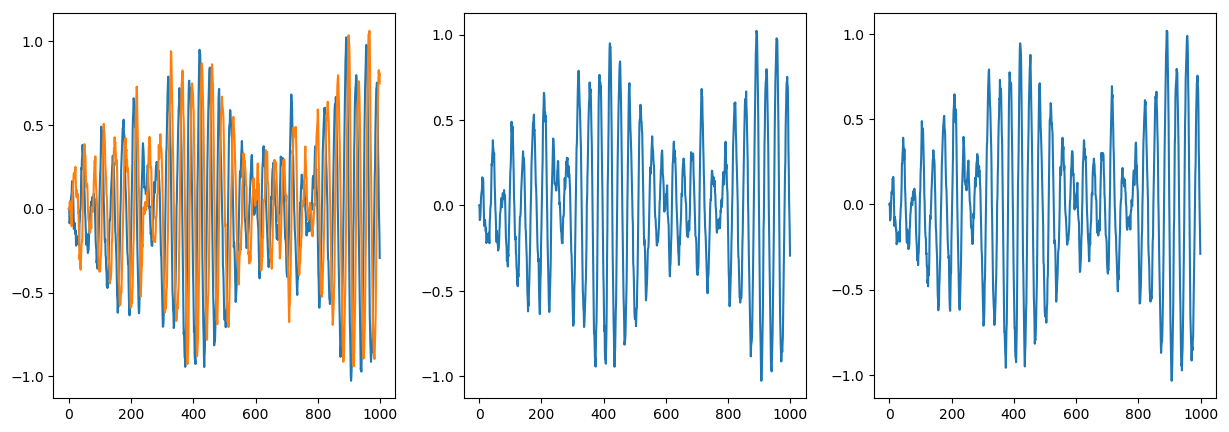

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006139E4A8>

In [2]:
# signal statistics 
N = 1000
fs = 100

# process parameters
ρ = 0.995
f = 3
σ_p = 0.04
σ_n = 0.01

# create signal (option 1)
z = Array{Complex{Float64},1}(undef, N)
x = Array{Float64,1}(undef, N)
y = Array{Float64,1}(undef, N)
z[1] = 0 + 0*1im
x[1] = 0
y[1] = 0
for n = 2:N
    z[n] = ρ*z[n-1]*exp(1im*f/fs*2*pi) + rand(Normal(0, σ_p)) + rand(Normal(0, σ_p))*1im
    x[n] = real(z[n])
    y[n] = rand(Normal(x[n], σ_n))
end

_, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[1].plot(real(z))
ax[1].plot(imag(z))
ax[2].plot(x)
ax[3].plot(y)


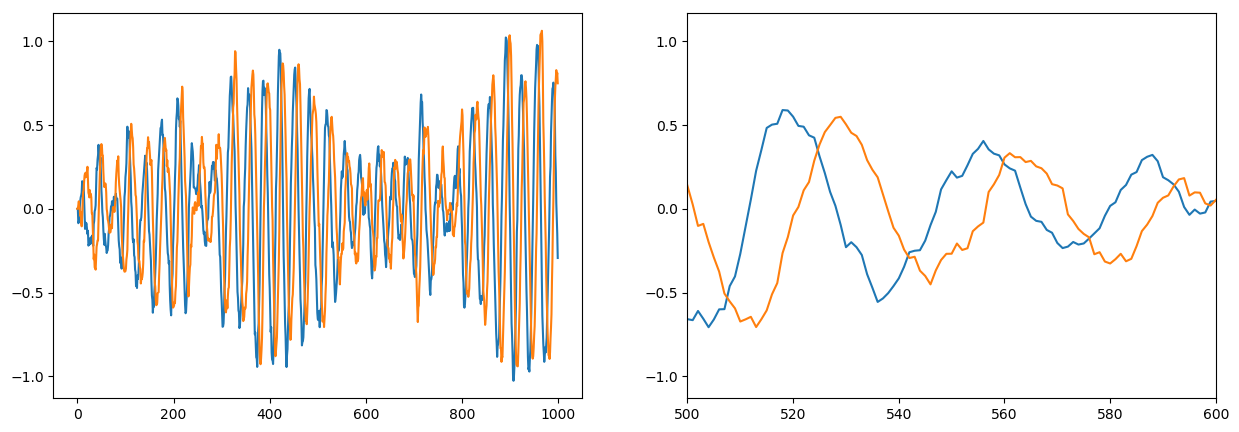

(500, 600)

In [3]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[1].plot(real(z))
ax[1].plot(imag(z))
ax[2].plot(real(z))
ax[2].plot(imag(z))
ax[2].set_xlim(500, 600)

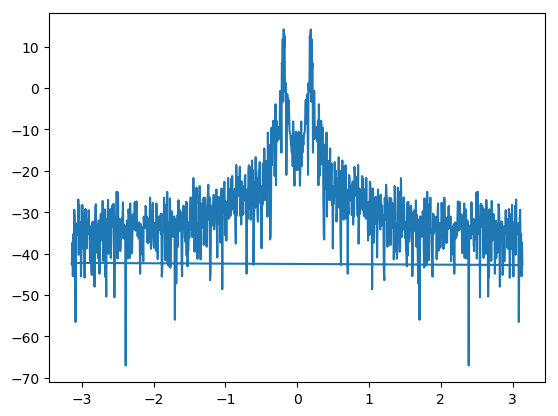

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006272B978>

In [4]:
plt.plot(FFTW.fftfreq(length(x), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(x)).^2)./length(x)))

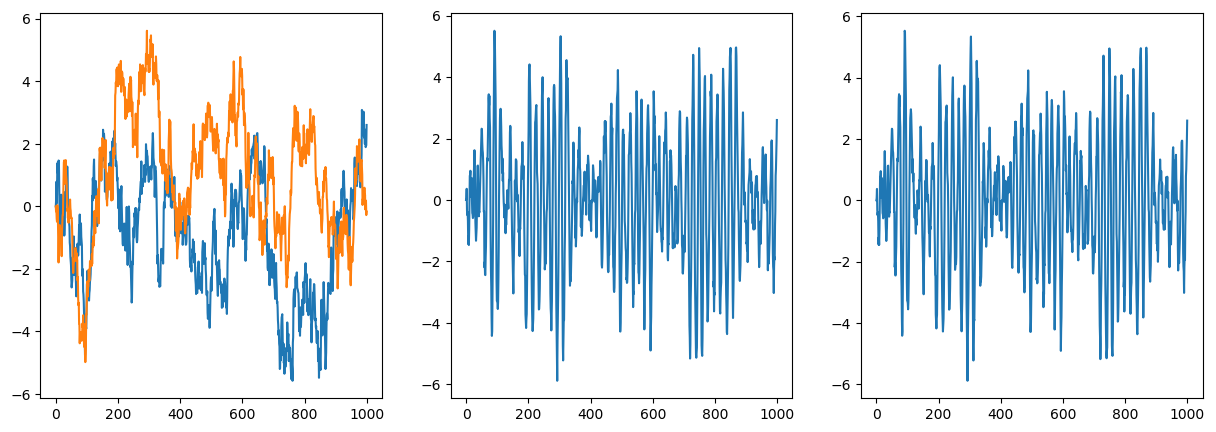

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000637B30B8>

In [5]:
# signal statistics 
N = 1000
fs = 100

# process parameters
ρ = 0.99
f = 5
σ_p = 0.4
σ_n = 0.01

# create signal (option 1)
s = Array{Complex{Float64},1}(undef, N)
x = Array{Float64,1}(undef, N)
y = Array{Float64,1}(undef, N)
s[1] = 0 + 0*1im
x[1] = 0
y[1] = 0
for n = 2:N
    s[n] = ρ*s[n-1] + rand(Normal(0, σ_p)) + rand(Normal(0, σ_p))*1im
    x[n] = real(s[n]*exp(-1im*f/fs*2*pi*n))
    y[n] = rand(Normal(x[n], σ_n))
end

_, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[1].plot(real(s))
ax[1].plot(imag(s))
ax[2].plot(x)
ax[3].plot(y)

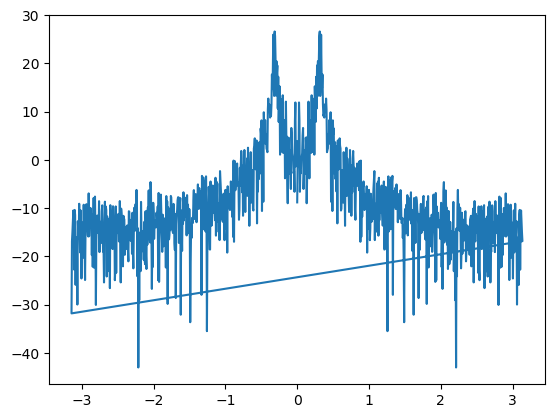

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000063869438>

In [6]:
plt.plot(FFTW.fftfreq(length(x), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(x)).^2)./length(x)))

In [7]:
signal, fs_sig = wavread("../data/airco.wav", format="native")
fs_sig = Int(fs_sig)
signal = Float64.(signal)
    
# crop signal
signal = signal[1*fs_sig+1:(1+3)*fs_sig]
    
# preprocess signal and save
signal = preprocess(signal, fs_sig, fs_desired=8000, normalization_method="max")
t = collect(1:length(signal))/8000
audioplayers(signal, fs=8000)

<source src="data:audio/wav;base64,UklGRjx3AQBXQVZFZm10ICgAAAD+/wEAQB8AAAB9AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQB3AQCPiwk+PFyWPtb3oz6gabY+rza3PkTc0T4i2u4+DFoFP51wDT/viv4+NsPaPk3byD6I/L0+dfrSPsqLzj5nj8E+gBmSPmcrkT7TxpM+pr2xPgBDjj6q3IE+my9xPj5f/j1yQDs+rf0LPp6HN712nFe+m9d3vqNREb79/vc8sMS9PfVv37zQFO29f3dAvqgy2726alO9epwdvlZsK77GdZC+WnHRvmRf7L4KGdu+qESOvn1omL4XInS+i3qkvr8Ct74YCMO+x9b2vhP8BL8fjAC/6XoJv2bi7b62i7i+L1Jivk7ecL6wzJq+ZtmIvtxacL6cl0i+hSihva+MP73PGmq8u1wDvg+Ql76MIJ++ejtDvgrf9LwjK389TcmGO+fVqb0Hk4S9f+bOPf8EeT73lFo+SEQ2PocSPz22KWY92tuUPtMY9j4rpQU/uu3QPjuPlz7S8Lw+QCIEPzD+Jz9MJCQ/BBEKP07QGT+sPiQ/SNw2P6M6JT/1UAQ/O+D0Pibo5j4vpes+lHfkPvg5tj48kYM+ErOTPicXvz5J5qE+lD4BPrBlAL3oSBO9KMMoPTrj6j2E+747uuAlvlpfub4jydW+GkmnviItQ74Zfm++TsWrvlmJzb79quO+r4zrvjjg2r4PeN6+PwfQvovFvL4FyrO+N/6svr9Xsb7gNHW+wiyAvtI/gL5LyFu+92R3vkqofb6cuFG+Z0aKviAFgr5PBH2+9/V1vjtMM75zYhS+neCbvmRNBr+9Hhe/m2sGv//UyL6Dh3++wp1Ovo6edL7sLcG+iiW8voWQuL74W6S+GKNSvs7ECb6QpSG+Rky2vf7mi711jH+9jXe2POozTj6GvKk+Yl7GPpa/wD6Ln5U+FfGfPnOWzj5U/wk/gwooPxL1Jj+tQgw/7eT9PjeYAj8L3yk/XshBP3MvJT+58AA/y5yxPpVupD79bbM+rZIGP3s4OD9MoD4/RsMqP/uyBj+0MP0+PLzbPgSE7z76Vss+MeqUPnzQYj4dIT8+uiQzPuHd6D0LolA8Uge+vR+mar4A/Gq+Ahh0viWVir7rcL6+VbIIv5f1I7/DZhu/VgkGv1O2875LxAq/QO4iv2ZPO7+EwC2/D8oXv8VJH7+xayW/+5oPv1jdBL8aN92+duLgvnyi2L4HQdW+JVewvqOmj74neJS+XtiEvq+2Vr5PGzy+DGgxvncKKb4SHia+kKO+vSJkUr4j13e9fBafPWy1qT3Zmyw7E2P0veyWEL0TPn69SoUEPVmdYj4OZVc+A3gnPYGXOrxPv4Q9p2aCPm9Lxj4CivA+8HvYPmiNqj4pBr0+RjbOPpKG2z6M19Q+rCbKPinasj5oBI8+5IaEPsqisj6hxrs+iIrZPvarzT6a4rQ+eCmJPt/9Lj4NvK49WNBRPn7hgz4Adbk+dqSaPofAPT6ooNA93b+8PVSUhD5M3bA+QcS+PhLrlz6AGyg9MdsjPQs2pz0slcE9MsVCPQ/+6bwFukS9vO9rvdywjDuIPpg8aoNTvZq0Ib6miFW+JIpbvrPWHL5yeXO+qi/0vpwTBL8w8he/brUHv7Jy9b5khw6/UvMzv5cHTL95xDi/9C8rv2fPD7+85vu+fXAUvzAODb+9XfS+7DOCvuHnRr7ulEa+CMokvq/Z2b0J0D88NvauPRY9yT3dDOQ9OjQ4PnPEmD6KT50+ILNsPmj6Fz6YiYI9bbS4PS0lqj5hzLs+/6W7PrX1gj6k/4c91YhSPSWquD1Ekpk+1fybPosnez4n0Fs+alOTPh/umz7X3Mc+dKDQPpUhzz7HIZc+DNQvPkh4nT6kEsI+97ncPpEpyj5Do6M+IJt3Pli8fj5KlpI+FX+BPkWBaD6sJxE+N3cDPpzPHD51NPo9VGQOPohSDT6yZsM9RhWuPcL+Mz0RO4E9F+nyO8Crx73cLQm+AGm2vaZgkr0VXfi8tgJpvGA6Eb41QlO+GZF5vv6SRb5iktW9Y1ZXvhsdtr41R9++C+HqvuR7Cb/ESAC/e3MDv2XGAb+2Gga/rUsXv6eyLr9jGFu/p5JsvxkSWb9a+0m/Ikcqv8G1Hb+HpxW/kPISv2oq976W6sq+c9WUvq4YJb5gR/K9DwCfvfq3BT6PP4A+NnbTPvZXAD8nkdc+/ZuvPnbWuT47/s4+YZr/Ps0wIz8omSE/UA8PP4Cf6j6HT+w+ei8YP6KfHT+5zw8/zRD3PiZG2z5tMf8+bsQOP6J3Bj/lSPA+OLC4PiZCuD67I60+cabFPrYjvT7tAqI+j3GNPjswqD6A1LE+ELanPhYfVD4Bhkw+VqplPtoajj4s/qU+oWWAPp1HEj40OO685g7EvUc/lL0bCTa+wx9nvmTbkb5tfaK+HWpbvmJkXr4s95a+ASrvvno/Fb8OGAm/hNX+vhC/Cb/bNh6/ggIvv+IXGr+8B/a+d1KavvYxkL6NoNW+tsUTv4dmGb+mpfy+L+i1vl32pr4Wd5C+yLejvgjRmb6q+Ty+SJ86vrUNQb4/OxC+MsTRvU0wfr2AgVi9CebFvSaVX74aEja+TJ2+vNquGT6lFUc+g/PvPcBEwj1onOA8N74ePk3sCz5Oims9kkRCPXMTlT1IXEo+uDGUPuLSoD4Jh5Y+W7+rPlCfzD5KIQI/STEdP4VtID9q+fo+DtvqPjO+5j6+ftU+kXwNPy/w5z5vN+g+4YYGP758ED9b2wQ/xG4NP6ZcGj8aAQQ/YxTtPnNrxT7V4pQ+mz2aPtwNtz4xNKc+iis5PqocsD0nDye9uMMDvoj+Fb6X64a+9CFyvh9smb5f16O+UprbvvHqGb/7dia/L30Qv/g/Ab84+gq/fhksvw6FXL9eR2q/Nf9gv4VcOr+EcQu/bIMFv2fc+b4oN+++XXL0vp6H2L46Fcu+IbPjvvy6qr53yYG+kwDkvQ08hr37jPO965dYvm8Ea74Rgu29xeKtPfX3GT0EUFK9H2jMvfMeLb120aE92HpiPpXBZj6YwDc+TUUqPpScdD4RIpA+zobcPkCw8j4CddE+aJHFPsaE0T4Dsc8+dwqUPgFURT5yz8w9pPx1PlyCxz4BNwE/snPVPvMajD6f1RM+cVVcPu+lxT4xAuk+HBjtPlK08z4QWOo+dWoYP/1HFT+XlRc/E4TtPjXAtD7Gapo+X7TCPhzz/D6vlQ4//qvsPo82mz4tHis+x18LPiCKJj6HcCs+pGm2PYqgL70UR7i9OWkLvh6/dLva9eo8iJWvO3IeF759/4O+FVzLvitJCr939Bq/z8Mcvxt4Gb9HxSG/0oARv8+zDL9Tmhi/LYIPv1ykDr9UxR+/i/knvxTZJ7+uxTK/KQZSv/JGSL9B+y+/IOosv4Y6E78ZxPi+l9XpvrMSwr5lTdG+o0LevjBppL7Qh6C+U8qFvgiRV74aika+/z6ivWSVIz27Uwk+UB98PqAPgD5q/5k+ORmPPvrliD7RdKs+zjLAPqQSqT53asA+AEWmPip+oj5q1tA+a0jJPphyzz7L9rc+AViPPmvKLD7Ch/09PQlZPRmpXD4wtJg+rMPKPjMFnD4YO20+JGuUPsrywT5F0Lg+42eGPiEd5j1Wd/M8IfCIPhQw8D4MLxc/f2YDP6G0mj6ZA+Q9xfuCPVOsGj7+WqQ+t7OcPs1GMT4p6aK94JI1vp6Nur09MKY9mRabPReYfr2dlx6+j2hzvs0wor6YKLC+BI3Hvpfj+75H+Aq/VdjxvoOO7b5zKsm+lsfPvmg05r5rO+O++ST8vvzT/74NqPG+j2zxvtPCu757loO+R21QvgwdJr5Mx1O+6kUsvmcvTD2CaZU+HgjUPsu7lD6FKQE+XlCaPC3oEz3Er0U+oxOnPrCSsz5e26Q+c/YjPss+Bz6g2ow+LPHFPhtX2T6aS

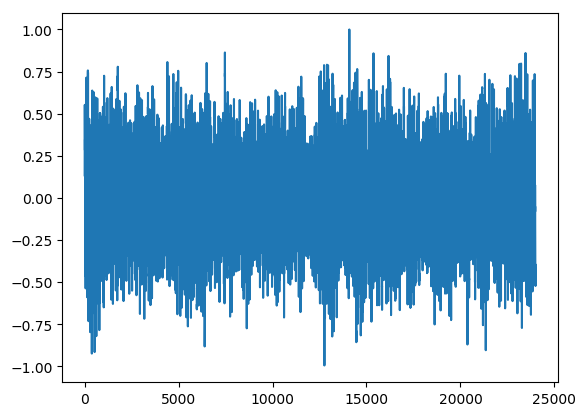

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000063904B00>

In [8]:
plt.plot(signal)

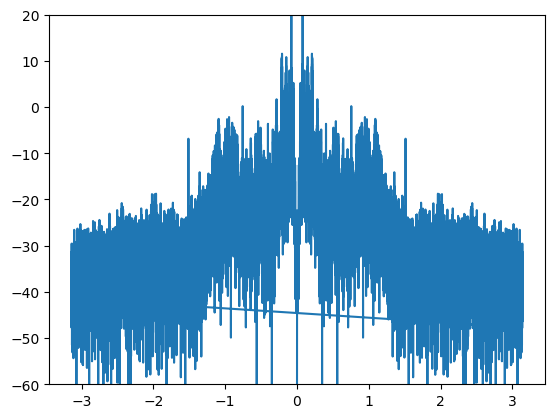

(-60, 20)

In [9]:
plt.plot(FFTW.fftfreq(length(signal), 8000)/8000*2*pi, 10*log10.((abs.(FFTW.fft(signal)).^2)./length(signal)))
plt.ylim(-60, 20)

In [10]:
# initialize memory struct for filter taps and spectrum coefficients
mem_spec = Array{Complex{Float64},2}(undef, Int(length(signal)/32)+10, 32)

buf = BufferData(signal, t, 32)

# loopt through time-domain signal
for k = 1:len(buf, 32)
        # calculate windowed FFT of taps
    mem_spec[k,:] = FFTW.fft(buf.buffer_s)
    
    FLAG_data_remaining = step!(buf, 32)

end

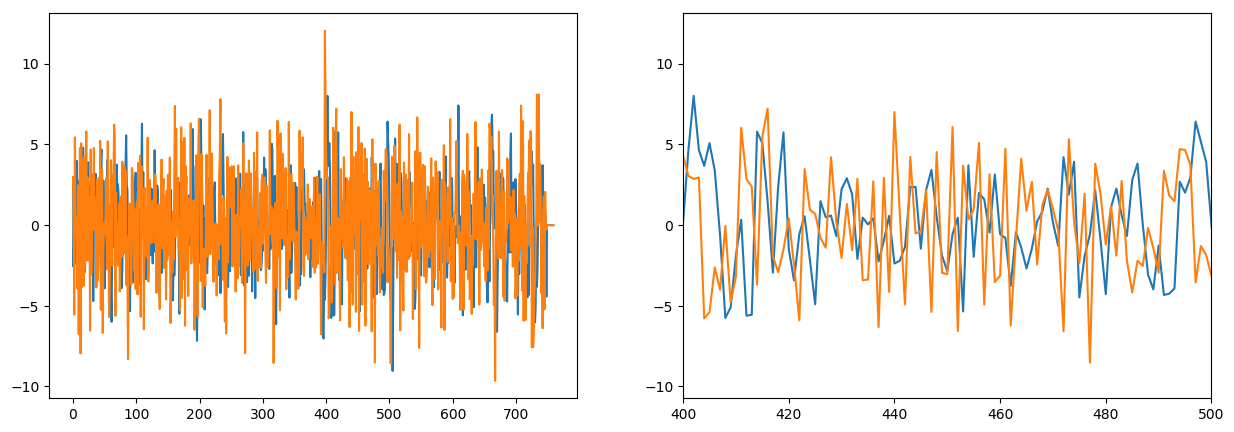

(400, 500)

In [11]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[1].plot(real(mem_spec[:,2]))
ax[1].plot(imag(mem_spec[:,2]))
ax[2].plot(real(mem_spec[:,2]))
ax[2].plot(imag(mem_spec[:,2]))
ax[2].set_xlim(400,500)

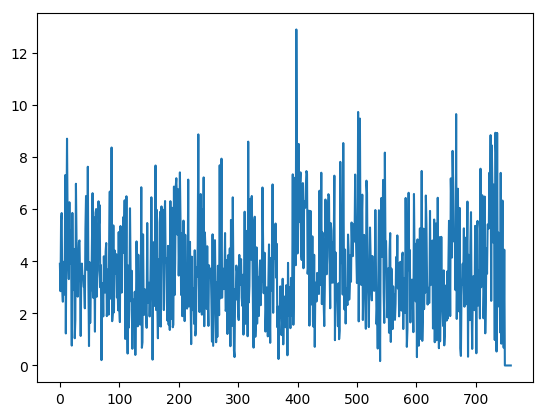

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000064325438>

In [12]:
plt.plot(abs.(mem_spec[:,2]))

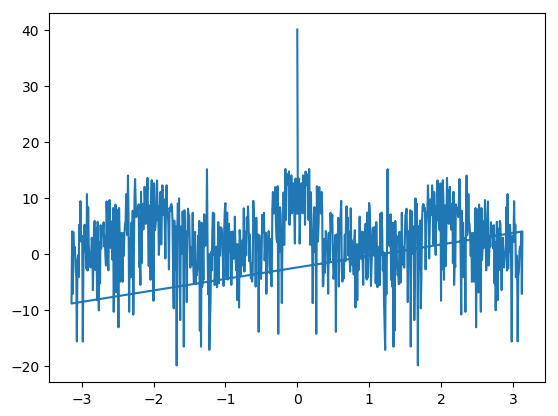

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000062689E10>

In [13]:
plt.plot(FFTW.fftfreq(length(abs.(mem_spec[:,2])), 8000)/8000*2*pi, 10*log10.((abs.(FFTW.fft(abs.(mem_spec[:,2]))).^2)./length(abs.(mem_spec[:,2]))))


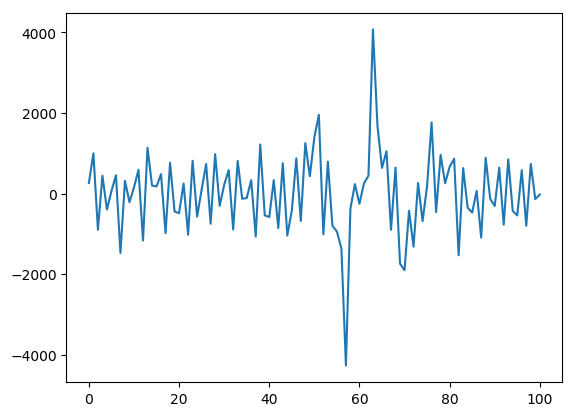

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000062669198>

In [14]:
plt.plot(xcorr(real(mem_spec[:,2]), imag(mem_spec[:,2]))[700:800])

In [15]:
# signal statistics 
N = 1000
fs = 100

# process parameters
ρ = 0.95
f = 5
σ_p = 0.4
σ_n = 0.01

# create signal (option 1)
si = Array{Complex{Float64},1}(undef, N)
xi = Array{Float64,1}(undef, N)
yi = Array{Float64,1}(undef, N)
si[1] = 0 + 0*1im
xi[1] = 0
yi[1] = 0
for n = 2:N
    si[n] = ρ*si[n-1] + rand(Normal(0, σ_p)) + rand(Normal(0, σ_p))*1im
    xi[n] = real(si[n]*exp(-1im*f/fs*2*pi*n))
    yi[n] = rand(Normal(xi[n], σ_n))
end

t = collect(1:N)/fs
;

In [16]:
fg = FactorGraph()

@RV smin ~ GaussianMeanVariance(placeholder(:μ_smin, dims=(4,)), placeholder(:Σ_smin, dims=(4,4)))
#@RV γ ~ Gamma(placeholder(:a_γ), placeholder(:b_γ))
#@RV θ ~ GaussianMeanVariance(placeholder())
@RV s ~ GaussianMeanVariance(smin, placeholder(:Σ_s, dims=(4,4)))
@RV x ~ DotProduct(s, placeholder(:c, dims=(4,)))
@RV y ~ GaussianMeanVariance(x, placeholder(:Σ_x))
placeholder(y, :y)

ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 11984335401813360745 -->
 11984335401813360745 
 
 placeholder_μ_smin 
 
<!-- 9297809208472160820 -->
 9297809208472160820 
 
 placeholder_Σ_smin 
 
<!-- 15504059411961667255 -->
 15504059411961667255 
 
 dot 
 dotproduct_1 
 
<!-- 1722544189040223289 -->
 1722544189040223289 
 
 placeholder_c 
 
<!-- 15504059411961667255--1722544189040223289 -->
 15504059411961667255--1722544189040223289 
 
 c 
 1 out 
 3 in2 
 
<!-- 1231872008338720447 -->
 1231872008338720447 
 
 𝒩 
 gaussianmeanvariance_2 
 
<!-- 15504059411961667255--1231872008338720447 -->
 15504059411961667255--1231872008338720447 
 
 s 
 1 out 
 2 in1 
 
<!-- 4506165133990896817 -->
 4506165133990896817 
 
 placeholder_y 
 
<!-- 2569754436619271578 -->
 2569754436619271578 
 
 𝒩 
 gaussianmeanvariance_3 
 
<!-- 4506165133990896817--2569754436619271578 -->
 4506165133990896817--2569754436619271578 
 
 y 
 1 out 
 1 out 
 
<!-- 13958544681146237055 -->
 13958544681146237055 
 
 placeholder_Σ_x 
 
<!-- 17906000797333484844 -->
 17906000797333484844 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 17906000797333484844--11984335401813360745 -->
 17906000797333484844--11984335401813360745 
 
 μ_smin 
 1 out 
 2 m 
 
<!-- 17906000797333484844--9297809208472160820 -->
 17906000797333484844--9297809208472160820 
 
 Σ_smin 
 1 out 
 3 v 
 
<!-- 2569754436619271578--15504059411961667255 -->
 2569754436619271578--15504059411961667255 
 
 x 
 1 out 
 2 m 
 
<!-- 2569754436619271578--13958544681146237055 -->
 2569754436619271578--13958544681146237055 
 
 Σ_x 
 1 out 
 3 v 
 
<!-- 12893080031726064967 -->
 12893080031726064967 
 
 placeholder_Σ_s 
 
<!-- 1231872008338720447--17906000797333484844 -->
 1231872008338720447--17906000797333484844 
 
 smin 
 1 out 
 2 m 
 
<!-- 1231872008338720447--12893080031726064967 -->
 1231872008338720447--12893080031726064967 
 
 Σ_s 
 1 out 
 3 v

In [17]:
algo = sumProductAlgorithm(s)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function step!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 4))

messages[1] = ruleSPGaussianMeanVarianceOutNPP(nothing, Message(ForneyLab.Multivariate, PointMass, m=data[:μ_smin]), Message(MatrixVariate, PointMass, m=data[:Σ_smin]))
messages[2] = ruleSPGaussianMeanVarianceOutNGP(nothing, messages[1], Message(MatrixVariate, PointMass, m=data[:Σ_s]))
messages[3] = ruleSPGaussianMeanVarianceMPNP(Message(ForneyLab.Univariate, PointMass, m=data[:y]), nothing, Message(ForneyLab.Univariate, PointMass, m=data[:Σ_x]))
messages[4] = ruleSPDotProductIn1GNP(messages[3], nothing, Message(ForneyLab.Multivariate, PointMass, m=data[:c]))

marginals[:s] = messages[2].dist * messages[4].dist

return marginals

end

end # block


In [18]:
μ_smin = zeros(4)
Σ_smin = 1e10*Ic(4)
Σ_s = 0.4*0.4*Ic(4)
Σ_x = 0.01*0.01

f = [5, 10]

s_extracted = Array{Float64,2}(undef, N, 2*length(f))

for n = 1:N
    marginals = Dict()
    data = Dict(:μ_smin => μ_smin,
                :Σ_smin => Σ_smin,
                :Σ_s => Σ_s,
                :Σ_x => Σ_x,
                :c => vcat([cos(2*pi*f[k]*t[n]) for k=1:length(f)], [sin(2*pi*f[k]*t[n]) for k=1:length(f)]),
                :y => yi[n])
    
    # perform message passing
    step!(data, marginals)
    
    # perform updates
    μ_smin, Σ_smin = ForneyLab.unsafeMeanCov(marginals[:s])
    s_extracted[n,:] = μ_smin
    
end

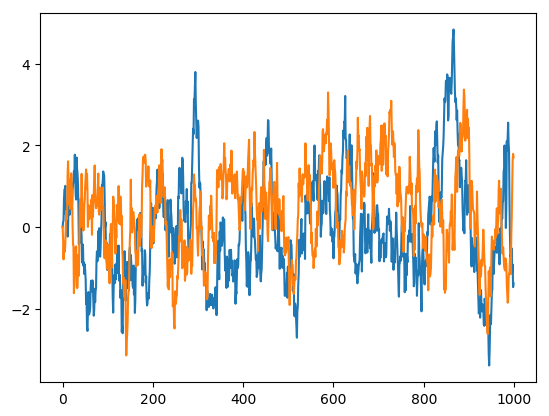

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000062699D68>

In [19]:
plt.plot(real(si))
plt.plot(imag(si))

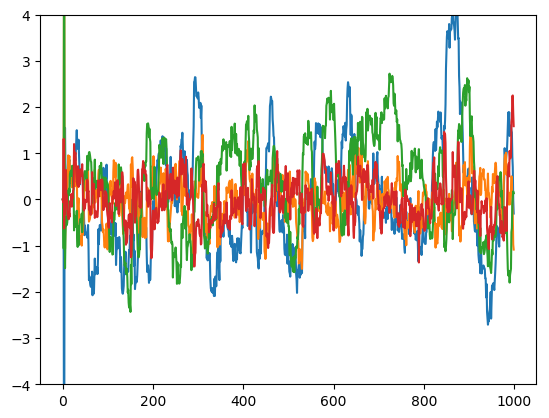

(-4, 4)

In [20]:
plt.plot(s_extracted)
plt.ylim(-4,4)

In [21]:
fg = FactorGraph()

smin = Array{Variable,1}(undef,4)
γ = Array{Variable,1}(undef,4)
s = Array{Variable,1}(undef,4)
θ = Array{Variable,1}(undef,4)
x = Array{Variable,1}(undef,4)

for k = 1:4
    #@RV smin[k] ~ GaussianMeanVariance(placeholder(pad(:μ_smin,k), dims=(1,)), placeholder(pad(:Σ_smin,k), dims=(1,1)))
    #@RV γ[k] ~ ForneyLab.Gamma(placeholder(pad(:a_γ,k)), placeholder(pad(:b_γ,k)))
    #@RV θ[k] ~ GaussianMeanVariance(placeholder(pad(:μ_θ,k), dims=(1,)), placeholder(pad(:Σ_θ,k), dims=(1,1)))
    #@RV s[k] ~ LAR.Autoregressive(θ[k], smin[k], γ[k])
    #@RV x[k] ~ DotProduct(s[k], placeholder(pad(:c,k), dims=(1,)))
    @RV smin[k] ~ GaussianMeanVariance(placeholder(pad(:μ_smin,k)), placeholder(pad(:Σ_smin,k)))
    @RV γ[k] ~ ForneyLab.Gamma(placeholder(pad(:a_γ,k)), placeholder(pad(:b_γ,k)))
    @RV θ[k] ~ GaussianMeanVariance(placeholder(pad(:μ_θ,k)), placeholder(pad(:Σ_θ,k)))
    @RV s[k] ~ LAR.Autoregressive(θ[k], smin[k], γ[k])
    @RV x[k] = s[k]*placeholder(pad(:c,k))
end

@RV xtot = sum(x)
@RV y ~ GaussianMeanVariance(xtot, placeholder(:Σ_x))
placeholder(y, :y)

q = PosteriorFactorization([smin[1], s[1], smin[2], s[2], smin[3], s[3], smin[4], s[4]], γ[1], θ[1], γ[2], θ[2], γ[3], θ[3], γ[4], θ[4], ids=[:S, :γ1, :θ1, :γ2, :θ2, :γ3, :θ3, :γ4, :θ4])

ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 14738409160131110160 -->
 14738409160131110160 
 
 Gam 
 gamma_2 
 
<!-- 7428951626516827577 -->
 7428951626516827577 
 
 placeholder_b_γ_02 
 
<!-- 14738409160131110160--7428951626516827577 -->
 14738409160131110160--7428951626516827577 
 
 b_γ_02 
 1 out 
 3 b 
 
<!-- 2116775088386126149 -->
 2116775088386126149 
 
 placeholder_a_γ_02 
 
<!-- 14738409160131110160--2116775088386126149 -->
 14738409160131110160--2116775088386126149 
 
 a_γ_02 
 1 out 
 2 a 
 
<!-- 3222556926547142399 -->
 3222556926547142399 
 
 placeholder_μ_θ_03 
 
<!-- 17894499964203252226 -->
 17894499964203252226 
 
 𝒩 
 gaussianmeanvariance_3 
 
<!-- 930857683806672456 -->
 930857683806672456 
 
 placeholder_Σ_smin_02 
 
<!-- 17894499964203252226--930857683806672456 -->
 17894499964203252226--930857683806672456 
 
 Σ_smin_02 
 1 out 
 3 v 
 
<!-- 15646896650263273650 -->
 15646896650263273650 
 
 placeholder_μ_smin_02 
 
<!-- 17894499964203252226--15646896650263273650 -->
 17894499964203252226--15646896650263273650 
 
 μ_smin_02 
 1 out 
 2 m 
 
<!-- 12560424521691247194 -->
 12560424521691247194 
 
 𝒩 
 gaussianmeanvariance_5 
 
<!-- 8652381672761284811 -->
 8652381672761284811 
 
 placeholder_μ_smin_03 
 
<!-- 12560424521691247194--8652381672761284811 -->
 12560424521691247194--8652381672761284811 
 
 μ_smin_03 
 1 out 
 2 m 
 
<!-- 11318197806533388803 -->
 11318197806533388803 
 
 placeholder_Σ_smin_03 
 
<!-- 12560424521691247194--11318197806533388803 -->
 12560424521691247194--11318197806533388803 
 
 Σ_smin_03 
 1 out 
 3 v 
 
<!-- 16879157845057069312 -->
 16879157845057069312 
 
 placeholder_c_02 
 
<!-- 2123166255360086688 -->
 2123166255360086688 
 
 𝒩 
 gaussianmeanvariance_4 
 
<!-- 13460571262640088744 -->
 13460571262640088744 
 
 placeholder_Σ_θ_02 
 
<!-- 2123166255360086688--13460571262640088744 -->
 2123166255360086688--13460571262640088744 
 
 Σ_θ_02 
 1 out 
 3 v 
 
<!-- 7025555982069690554 -->
 7025555982069690554 
 
 placeholder_μ_θ_02 
 
<!-- 2123166255360086688--7025555982069690554 -->
 2123166255360086688--7025555982069690554 
 
 μ_θ_02 
 1 out 
 2 m 
 
<!-- 12232393351322177861 -->
 12232393351322177861 
 
 𝒩 
 gaussianmeanvariance_7 
 
<!-- 3353573658432269203 -->
 3353573658432269203 
 
 placeholder_Σ_smin_04 
 
<!-- 12232393351322177861--3353573658432269203 -->
 12232393351322177861--3353573658432269203 
 
 Σ_smin_04 
 1 out 
 3 v 
 
<!-- 17894070179626414404 -->
 17894070179626414404 
 
 placeholder_μ_smin_04 
 
<!-- 12232393351322177861--17894070179626414404 -->
 12232393351322177861--17894070179626414404 
 
 μ_smin_04 
 1 out 
 2 m 
 
<!-- 17921181342504322539 -->
 17921181342504322539 
 
 placeholder_c_01 
 
<!-- 6584431869555571156 -->
 6584431869555571156 
 
 placeholder_Σ_θ_04 
 
<!-- 10515296662525702008 -->
 10515296662525702008 
 
 + 
 addition_3 
 
<!-- 3369578184137342039 -->
 3369578184137342039 
 
 × 
 multiplication_4 
 
<!-- 10515296662525702008--3369578184137342039 -->
 10515296662525702008--3369578184137342039 
 
 x_4 
 1 out 
 3 in2 
 
<!-- 10217808235120837520 -->
 10217808235120837520 
 
 + 
 addition_2 
 
<!-- 10515296662525702008--10217808235120837520 -->
 10515296662525702008--10217808235120837520 
 
 variable_6 
 1 out 
 2 in1 
 
<!-- 2638067130001165948 -->
 2638067130001165948 
 
 × 
 multiplication_1 
 
<!-- 2638067130001165948--17921181342504322539 -->
 2638067130001165948--17921181342504322539 
 
 c_01 
 1 out 
 2 in1 
 
<!-- 4851632757158277683 -->
 4851632757158277683 
 
 AR 
 autoregressive_1 
 
<!-- 2638067130

In [22]:
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function stepγ2!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaOut(nothing, ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:a_γ_02]), ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:b_γ_02]))
messages[2] = ruleSVariationalARIn3PPPN(marginals[:s_2_smin_2], marginals[:θ_2], nothing)

marginals[:γ_2] = messages[1].dist * messages[2].dist

return marginals

end

function stepγ4!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaOut(nothing, ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:a_γ_04]), ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:b_γ_04]))
messages[2] = ruleSVariationalARIn3PPPN(marginals[:s_4_smin_4], marginals[:θ_4], nothing)

marginals[:γ_4] = messages[1].dist * messages[2].dist

return marginals

end

function stepθ1!(data::Dict, marginals::Dict=Dict(), messages::Vect

In [23]:
# μ_smin = [[0.0], [0.0], [0.0], [0.0]]
# Σ_smin = [1e10*Ic(1), 1e10*Ic(1), 1e10*Ic(1), 1e10*Ic(1)]
# a_γ = [1.0, 1.0, 1.0, 1.0]
# b_γ = [0.001, 0.001, 0.001, 0.001]
# μ_θ = [[0.0], [0.0], [0.0], [0.0]]
# Σ_θ = [1e0*Ic(1), 1e0*Ic(1), 1e0*Ic(1), 1e0*Ic(1)]
# Σ_x = 1e-6
μ_smin = [0.0, 0.0, 0.0, 0.0]
Σ_smin = [1e1, 1e1, 1e1, 1e1]
a_γ = [0.1, 0.1, 0.1, 0.1]
b_γ = [0.001, 0.001, 0.001, 0.001]
μ_θ = [0.0, 0.0, 0.0, 0.0]
Σ_θ = [1e0, 1e0, 1e0, 1e0]
Σ_x = 1e-8
;

In [24]:
f = [5, 10]

s_extracted = Array{Float64,2}(undef, N, 2*length(f))
θ_extracted = Array{Float64,2}(undef, N, 2*length(f))

for n = 1:N
    # create marginals dictionary
    marginals = Dict()
    for k = 1:4
        marginals[pad(:γ,k,len=1)] = ProbabilityDistribution(ForneyLab.Gamma, a=a_γ[k], b=b_γ[k])
        #marginals[pad(:θ,k,len=1)] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=μ_θ[k], v=Σ_θ[k])
        marginals[pad(:θ,k,len=1)] = ProbabilityDistribution(GaussianMeanVariance, m=μ_θ[k], v=Σ_θ[k])
    end
    
    # create data dictionary
    data = Dict()
    for k = 1:4
        data[pad(:μ_smin, k)] = μ_smin[k]
        data[pad(:Σ_smin, k)] = Σ_smin[k]
        data[pad(:a_γ, k)] = a_γ[k]
        data[pad(:b_γ, k)] = b_γ[k]
        data[pad(:μ_θ, k)] = μ_θ[k]
        data[pad(:Σ_θ, k)] = Σ_θ[k]
        if k <= 2
            data[pad(:c, k)] = cos(2*pi*f[k]*t[n])
        else
            data[pad(:c, k)] = sin(2*pi*f[k-2]*t[n])
        end
    end
    data[:Σ_x] = Σ_x
    data[:y] = yi[n]

    # perform message passing
    for _ in 1:10
        Base.invokelatest(stepS!, data, marginals)
        Base.invokelatest(stepθ4!, data, marginals)
        Base.invokelatest(stepθ1!, data, marginals)
        Base.invokelatest(stepθ3!, data, marginals)
        Base.invokelatest(stepθ2!, data, marginals)
        Base.invokelatest(stepγ4!, data, marginals)
        Base.invokelatest(stepγ3!, data, marginals)
        Base.invokelatest(stepγ1!, data, marginals)
        Base.invokelatest(stepγ2!, data, marginals)
    end
    
    # perform updates
    for k = 1:4
        μ_smin[k] = ForneyLab.unsafeMean(marginals[pad(:s,k,len=1)*pad(:_smin,k,len=1)])[1]
        Σ_smin[k] = ForneyLab.unsafeCov(marginals[pad(:s,k,len=1)*pad(:_smin,k,len=1)])[1,1]
        μ_θ[k] = ForneyLab.unsafeMean(marginals[pad(:θ,k,len=1)])
        Σ_θ[k] = ForneyLab.unsafeCov(marginals[pad(:θ,k,len=1)])
        a_γ[k] = marginals[pad(:γ,k,len=1)].params[:a]
        b_γ[k] = marginals[pad(:γ,k,len=1)].params[:b]
    end
    
    # save some values
    for k = 1:4
        s_extracted[n,k] = μ_smin[k][1]
        θ_extracted[n,k] = μ_θ[k][1]
    end
    
end

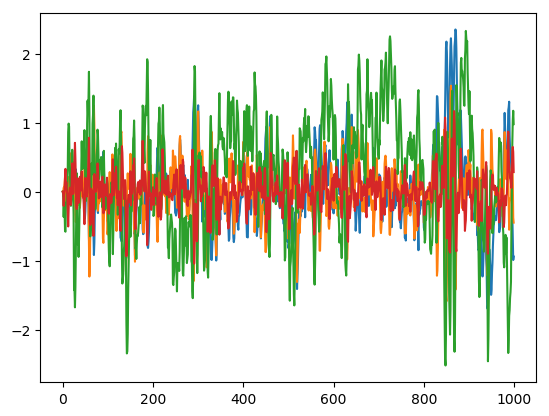

4-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000010FADD8>
 PyObject <matplotlib.lines.Line2D object at 0x00000000010FAF28>
 PyObject <matplotlib.lines.Line2D object at 0x00000000011050B8>
 PyObject <matplotlib.lines.Line2D object at 0x0000000001105208>

In [25]:
plt.plot(s_extracted)

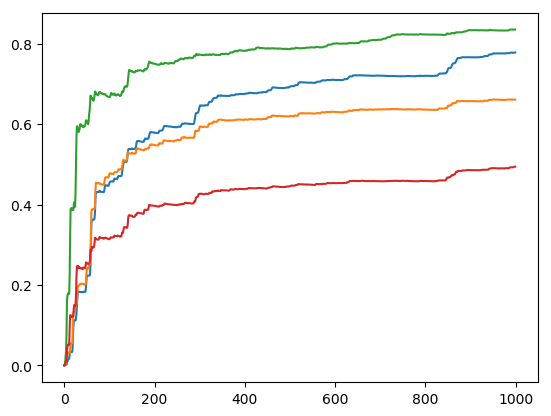

4-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001163208>
 PyObject <matplotlib.lines.Line2D object at 0x0000000001163358>
 PyObject <matplotlib.lines.Line2D object at 0x00000000011634A8>
 PyObject <matplotlib.lines.Line2D object at 0x00000000011635F8>

In [26]:
plt.plot(θ_extracted)

In [27]:
θ_extracted

1000×4 Array{Float64,2}:
 0.0          0.0          0.0         0.0       
 0.0          0.0          0.0         0.0       
 0.00099732  -0.000298327  0.00481495  0.00379563
 0.00191951   0.00157585   0.0223984   0.00928161
 0.00191951   0.00531687   0.034848    0.00928161
 0.00192015   0.0195455    0.0804804   0.00930129
 0.00656646   0.028683     0.162599    0.0364912 
 0.00938637   0.0277539    0.173829    0.0464922 
 0.0124256    0.0286808    0.178743    0.0511234 
 0.0151252    0.0314475    0.178743    0.0511234 
 0.0156686    0.0320616    0.177268    0.0503665 
 0.0178668    0.0330819    0.17862     0.0531898 
 0.028746     0.0301949    0.228416    0.0940564 
 ⋮                                               
 0.777649     0.661123     0.835388    0.492714  
 0.778138     0.661295     0.835388    0.492714  
 0.777805     0.661056     0.835511    0.492797  
 0.777737     0.661041     0.8355      0.492742  
 0.777691     0.661036     0.835528    0.492721  
 0.777678     0.660963   

# Same parameters on cos and sin functions

In [28]:
# signal statistics 
N = 5000
fs = 30

# process parameters
ρ = 0.95
f = 5
σ_p = 0.2
σ_n = 0.01

# create signal (option 1)
si = Array{Complex{Float64},1}(undef, N)
xi = Array{Float64,1}(undef, N)
yi = Array{Float64,1}(undef, N)
si[1] = 0 + 0*1im
xi[1] = 0
yi[1] = 0
for n = 2:N
    si[n] = ρ*si[n-1] + rand(Normal(0, σ_p)) + rand(Normal(0, σ_p))*1im
    xi[n] = real(si[n]*exp(-1im*f/fs*2*pi*n))
    yi[n] = rand(Normal(xi[n], σ_n))
end

t = collect(1:N)/fs
;

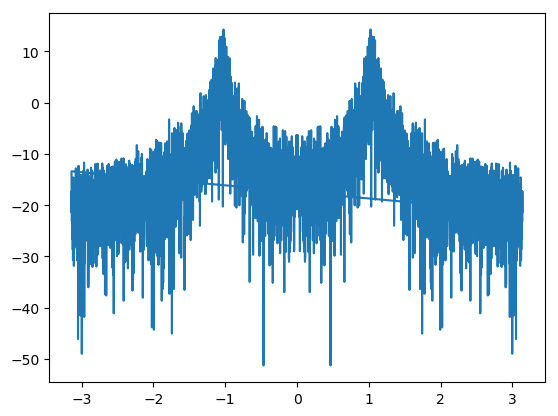

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000011B92E8>

In [29]:
plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

In [30]:
fg = FactorGraph()

wsize=2

smin = Array{Variable,1}(undef,4)
γ = Array{Variable,1}(undef,2)
s = Array{Variable,1}(undef,4)
θ = Array{Variable,1}(undef,2)
x = Array{Variable,1}(undef,4)

for k = 1:2
    @RV γ[k] ~ ForneyLab.Gamma(placeholder(pad(:a_γ,k)), placeholder(pad(:b_γ,k)))
    @RV θ[k] ~ GaussianMeanVariance(placeholder(pad(:μ_θ,k)), placeholder(pad(:Σ_θ,k)))    
end

for k = 1:4
    #@RV smin[k] ~ GaussianMeanVariance(placeholder(pad(:μ_smin,k), dims=(1,)), placeholder(pad(:Σ_smin,k), dims=(1,1)))
    #@RV γ[k] ~ ForneyLab.Gamma(placeholder(pad(:a_γ,k)), placeholder(pad(:b_γ,k)))
    #@RV θ[k] ~ GaussianMeanVariance(placeholder(pad(:μ_θ,k), dims=(1,)), placeholder(pad(:Σ_θ,k), dims=(1,1)))
    #@RV s[k] ~ LAR.Autoregressive(θ[k], smin[k], γ[k])
    #@RV x[k] ~ DotProduct(s[k], placeholder(pad(:c,k), dims=(1,)))
    @RV smin[k] ~ GaussianMeanVariance(placeholder(pad(:μ_smin,k)), placeholder(pad(:Σ_smin,k)))
    if k == 1 | k == 3
        @RV s[k] ~ LAR.Autoregressive(θ[1], smin[k], γ[1])
    else
        @RV s[k] ~ LAR.Autoregressive(θ[2], smin[k], γ[2])
    end
    @RV x[k] =  s[k] * placeholder(pad(:c,k))
end

@RV xtot = sum(x)
@RV y ~ GaussianMeanVariance(xtot, placeholder(:Σ_x))
placeholder(y, :y)

q = PosteriorFactorization([smin[1], s[1], smin[2], s[2], smin[3], s[3], smin[4], s[4]], γ[1], θ[1], γ[2], θ[2], ids=[:S, :γ1, :θ1, :γ2, :θ2])

ForneyLab.draw(fg, external_viewer=true)

TypeError: TypeError: in keyword argument external_viewer, expected Symbol, got Bool

In [31]:
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function stepγ2!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 6))

messages[1] = ruleVBGammaOut(nothing, ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:a_γ_02]), ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:b_γ_02]))
messages[2] = ruleSVariationalARIn3PPPN(marginals[:s_1_smin_1], marginals[:θ_2], nothing)
messages[3] = ruleSVariationalARIn3PPPN(marginals[:s_2_smin_2], marginals[:θ_2], nothing)
messages[4] = ruleSVariationalARIn3PPPN(marginals[:s_4_smin_4], marginals[:θ_2], nothing)
messages[5] = ruleSPEqualityGammaWishart(messages[3], nothing, messages[4])
messages[6] = ruleSPEqualityGammaWishart(nothing, messages[2], messages[5])

marginals[:γ_2] = messages[1].dist * messages[6].dist

return marginals

end

function stepθ1!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGaussianMeanVarianceOut(nothing, ProbabilityDistribution(ForneyLab.Univa

In [32]:
# μ_smin = [[0.0], [0.0], [0.0], [0.0]]
# Σ_smin = [1e10*Ic(1), 1e10*Ic(1), 1e10*Ic(1), 1e10*Ic(1)]
# a_γ = [1.0, 1.0, 1.0, 1.0]
# b_γ = [0.001, 0.001, 0.001, 0.001]
# μ_θ = [[0.0], [0.0], [0.0], [0.0]]
# Σ_θ = [1e0*Ic(1), 1e0*Ic(1), 1e0*Ic(1), 1e0*Ic(1)]
# Σ_x = 1e-6
μ_smin = rand(4)#[0.0, 0.0, 0.0, 0.0]
Σ_smin = [1e10, 1e10, 1e10, 1e10]
a_γ = [1.0, 1.0]
b_γ = [0.001, 0.001]
μ_θ = [0.95, 0.90]
Σ_θ = [1e-4, 1e-4]
Σ_x = 0.01*0.01
;

In [33]:
f = [5, 10]

s_extracted = Array{Float64,2}(undef, N, 2*length(f))
θ_extracted = Array{Float64,2}(undef, N, length(f))
inv_mean_γ = Array{Float64,2}(undef, N, length(f))
marginals = Dict()

for n = 1:N
    # create marginals dictionary
    for k = 1:2
        marginals[pad(:γ,k,len=1)] = ProbabilityDistribution(ForneyLab.Gamma, a=a_γ[k], b=b_γ[k])
        #marginals[pad(:θ,k,len=1)] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=μ_θ[k], v=Σ_θ[k])
        marginals[pad(:θ,k,len=1)] = ProbabilityDistribution(GaussianMeanVariance, m=μ_θ[k], v=Σ_θ[k])
    end
    
    # create data dictionary
    data = Dict()
    for k = 1:4
        data[pad(:μ_smin, k)] = μ_smin[k]
        data[pad(:Σ_smin, k)] = Σ_smin[k]
        if k <= 2
            data[pad(:c, k)] = cos(2*pi*f[k]*t[n])
        else
            data[pad(:c, k)] = sin(2*pi*f[k-2]*t[n])
        end
    end
    for k = 1:2
        data[pad(:a_γ, k)] = a_γ[k]
        data[pad(:b_γ, k)] = b_γ[k]
        data[pad(:μ_θ, k)] = μ_θ[k]
        data[pad(:Σ_θ, k)] = Σ_θ[k]
    end
    data[:Σ_x] = Σ_x
    data[:y] = yi[n]

    # perform message passing
    for _ in 1:1
        Base.invokelatest(stepS!, data, marginals)
        Base.invokelatest(stepγ1!, data, marginals)
        Base.invokelatest(stepγ2!, data, marginals)
        Base.invokelatest(stepθ1!, data, marginals)
        Base.invokelatest(stepθ2!, data, marginals)
        #Base.invokelatest(stepθ1!, data, marginals)
        #Base.invokelatest(stepγ1!, data, marginals)
        #Base.invokelatest(stepθ2!, data, marginals)
        #Base.invokelatest(stepγ2!, data, marginals)
    end
    
    # perform updates
    for k = 1:4
        μ_smin[k] = ForneyLab.unsafeMean(marginals[pad(:s,k,len=1)*pad(:_smin,k,len=1)])[1]
        Σ_smin[k] = ForneyLab.unsafeCov(marginals[pad(:s,k,len=1)*pad(:_smin,k,len=1)])[1,1]
    end
    for k = 1:2
        μ_θ[k] = ForneyLab.unsafeMean(marginals[pad(:θ,k,len=1)])
        Σ_θ[k] = ForneyLab.unsafeCov(marginals[pad(:θ,k,len=1)])
        a_γ[k] = marginals[pad(:γ,k,len=1)].params[:a]
        b_γ[k] = marginals[pad(:γ,k,len=1)].params[:b]
    end
    
    # save some values
    for k = 1:4
        s_extracted[n,k] = μ_smin[k][1]
    end
    for k = 1:2
        θ_extracted[n,k] = μ_θ[k][1]
        inv_mean_γ[n,k] = b_γ[k]/a_γ[k]
    end
end

In [34]:
marginals[:smin_1]

𝒩(xi=47.41, w=34.44)


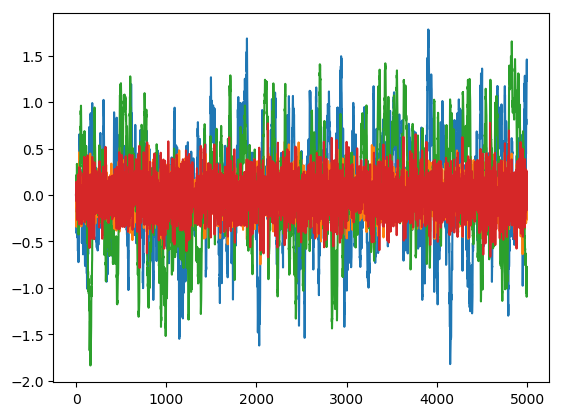

4-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000021E4860>
 PyObject <matplotlib.lines.Line2D object at 0x00000000021E49B0>
 PyObject <matplotlib.lines.Line2D object at 0x00000000021E4B00>
 PyObject <matplotlib.lines.Line2D object at 0x00000000021E4C50>

In [35]:
plt.plot(s_extracted)

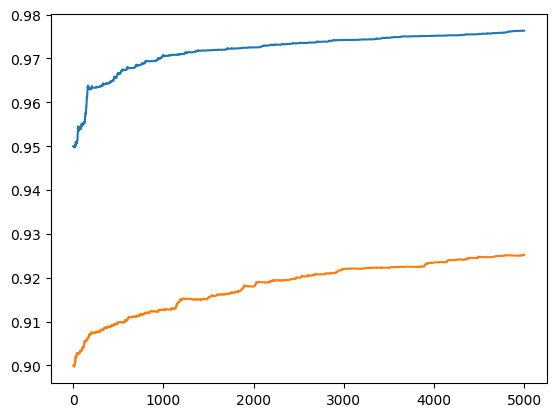

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000000224DC50>
 PyObject <matplotlib.lines.Line2D object at 0x000000000224DDA0>

In [36]:
plt.plot(θ_extracted)

In [37]:
# mean variance
1/a_γ[1]*b_γ[1], 1/a_γ[2]*b_γ[2]

(0.004206977668603082, 0.016730961548699592)

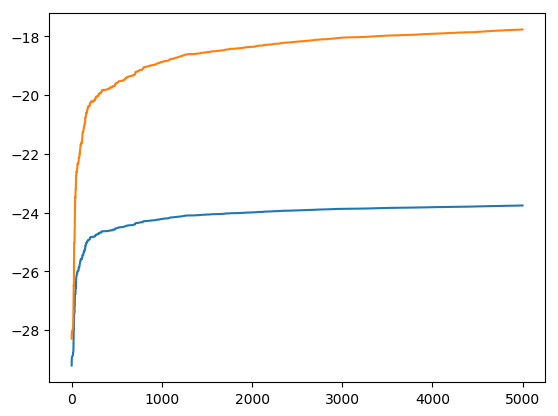

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000022ACB38>
 PyObject <matplotlib.lines.Line2D object at 0x00000000022ACC88>

In [38]:
plt.plot(10*log10.(inv_mean_γ))

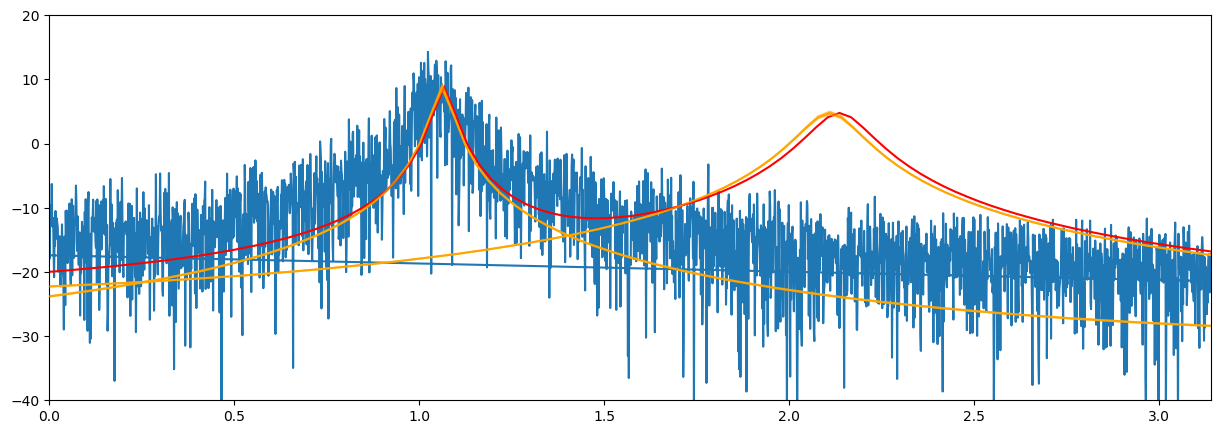

(0, 3.141592653589793)

In [39]:
plt.figure(figsize=(15,5))

plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

tmp_psd = zeros(101)
for k = 1:2
    θ_sampled, γ_sampled = AR_distributions([μ_θ[k]], mat(1/Σ_θ[k]), a_γ[k], b_γ[k])
    mean_psd, std_psd = summary_psd(θ_sampled, γ_sampled)
    mean_psd = vcat(reverse(mean_psd), mean_psd[2:end])
    std_psd = vcat(reverse(std_psd), std_psd[2:end])
    θx = collect(1:length(mean_psd))/length(mean_psd)*2*pi .- pi .+ 2*pi*f[k]/fs
    gca().plot(θx, mean_psd, color="orange", label="predicted psd")
    gca().fill_between(θx, mean_psd .- std_psd, mean_psd .+ std_psd, color="orange", alpha=0.5, zorder=100)
    tmp_psd = tmp_psd + 10 .^(mean_psd[100-Int(round(f[k]/fs*200)):200-Int(round(f[k]/fs*200))]/10)
end
gca().plot(collect(0:100)/100*pi, 10*log10.(tmp_psd), color="red")
plt.ylim(-40, 20)

plt.xlim(0,pi)

# Turing test (only 1 AR coef)

In [40]:
# signal statistics 
N = 50
fs = 10

# process parameters
ρ = 0.95
f = 2
σ_p = 0.2
σ_n = 0.01

# create signal (option 1)
si = Array{Complex{Float64},1}(undef, N)
xi = Array{Float64,1}(undef, N)
yi = Array{Float64,1}(undef, N)
si[1] = 0 + 0*1im
xi[1] = 0
yi[1] = 0
for n = 2:N
    si[n] = ρ*si[n-1] + rand(Normal(0, σ_p)) + rand(Normal(0, σ_p))*1im
    xi[n] = real(si[n]*exp(-1im*f/fs*2*pi*n))
    yi[n] = rand(Normal(xi[n], σ_n))
end

t = collect(1:N)/fs
;

In [41]:
using Turing
using StatsPlots

In [42]:
@model ARmodel(y, t, σn, σ1, σ2) = begin
    
    N = length(t)
    
    # specify AR coeficients
    θ1 ~ Uniform(0, 1)
    #θ2 ~ Uniform(0, 1)
    
    # specify std
    #σ1 ~ InverseGamma(2,3)
    #σ2 ~ InverseGamma(2,3)
    
    # specify prior on coefs
    s1 = Vector(undef, N)
    #s2 = Vector(undef, N)
    s3 = Vector(undef, N)
    #s4 = Vector(undef, N)
    x = Vector(undef, N)
    s1[1] ~ Normal(0, σ1)
    # s2[1] ~ Normal(0, σ2)
    s3[1] ~ Normal(0, σ1)
    # s4[1] ~ Normal(0, σ2)
    
    for n = 2:N
        s1[n] ~ Normal(θ1*s1[n-1], σ1)
        # s2[n] ~ Normal(θ2*s2[n-1], σ2)
        s3[n] ~ Normal(θ1*s3[n-1], σ1)
        # s4[n] ~ Normal(θ2*s4[n-1], σ2)
        # x[n] = s1[n]*cos(2*pi*5*t[n]) + s2[n]*cos(2*pi*20*t[n]) + s3[n]*sin(2*pi*5*t[n]) + s4[n]*sin(2*pi*20*t[n])
        x[n] = s1[n]*cos(2*pi*2*t[n]) + s3[n]*sin(2*pi*2*t[n])
        y[n] ~ Normal(x[n], σn)
    end
    return θ1#, θ2, σ1, σ2
end
 

##ARmodel#675 (generic function with 2 methods)

In [43]:
model = ARmodel(yi,t, 0.01, 0.2, 0)
advi = ADVI(10, 1000)
q = vi(model, advi);

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 14312359334494153018
└ @ Turing.Variational C:\Users\s151781\.julia\packages\Turing\cReBm\src\variational\VariationalInference.jl:204
[ADVI] Optimizing...: 100%|█████████████████████████████████████████| Time: 0:02:09


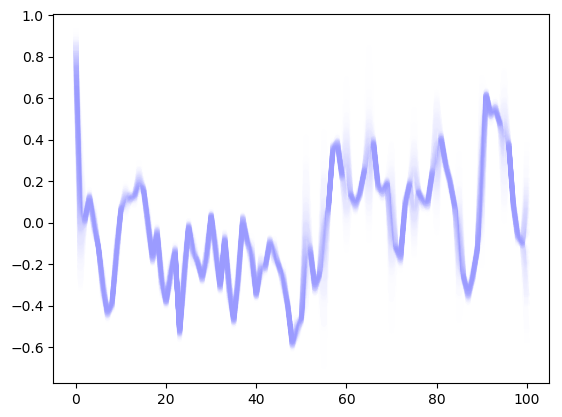

In [44]:
plt.plot(rand(q,100),color="blue", alpha=0.005, linewidth=4);

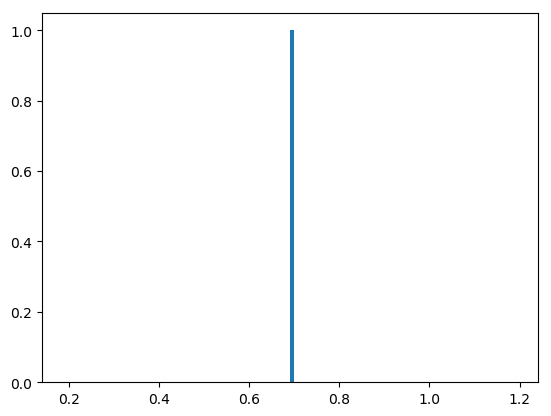

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.1900854229977933, 0.2000854229977933, 0.2100854229977933, 0.2200854229977933, 0.2300854229977933, 0.24008542299779329, 0.2500854229977933, 0.2600854229977933, 0.2700854229977933, 0.28008542299779327  …  1.1000854229977932, 1.1100854229977934, 1.1200854229977932, 1.1300854229977935, 1.1400854229977933, 1.1500854229977933, 1.1600854229977933, 1.1700854229977933, 1.1800854229977933, 1.1900854229977933], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x0000000064938940>, PyObject <matplotlib.patches.Rectangle object at 0x0000000064938710>, PyObject <matplotlib.patches.Rectangle object at 0x0000000064938F28>, PyObject <matplotlib.patches.Rectangle object at 0x0000000065BCC2B0>, PyObject <matplotlib.patches.Rectangle object at 0x0000000065BCC5F8>, PyObject <matplotlib.patches.Rectangle object at 0x0000000065BCC940>, PyObject <matplotlib.patches.Rectangle object at 0x

In [45]:
_, sym2range = Turing.Variational.bijector(model; sym_to_ranges = Val(true));

plt.hist(rand(q,1)[sym2range[:θ1]...,:], bins=100)

# Turing test (1 AR coef & noise)

In [46]:
@model ARmodel(y, t, σn) = begin
    
    N = length(t)
    
    # specify AR coeficients
    θ1 ~ Uniform(0, 1)
    #θ2 ~ Uniform(0, 1)
    
    # specify std
    σ1 ~ InverseGamma(1,1)
    
    # specify prior on coefs
    s1 = Vector(undef, N)
    s3 = Vector(undef, N)
    x = Vector(undef, N)
    s1[1] ~ Normal(0, σ1)
    s3[1] ~ Normal(0, σ1)
    
    for n = 2:N
        s1[n] ~ Normal(θ1*s1[n-1], σ1)
        s3[n] ~ Normal(θ1*s3[n-1], σ1)
        x[n] = s1[n]*cos(2*pi*2*t[n]) + s3[n]*sin(2*pi*2*t[n])
        y[n] ~ Normal(x[n], σn)
    end
    return θ1, σ1 #, #, θ2, σ1, σ2
end
 

##ARmodel#746 (generic function with 2 methods)

In [47]:
model = ARmodel(yi,t, 0.01)
advi = ADVI(10, 1000)
q = vi(model, advi);

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10896599470569503908
└ @ Turing.Variational C:\Users\s151781\.julia\packages\Turing\cReBm\src\variational\VariationalInference.jl:204
[ADVI] Optimizing...: 100%|█████████████████████████████████████████| Time: 0:02:14


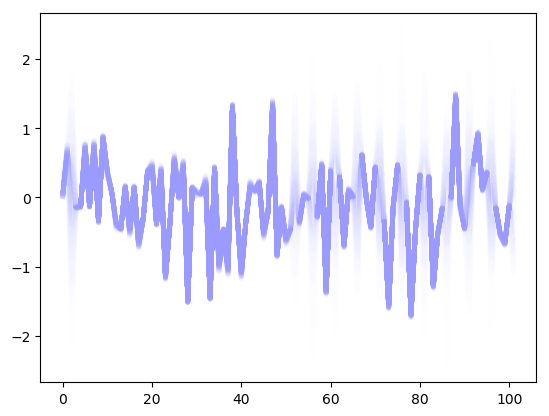

In [48]:
plt.plot(rand(q,100),color="blue", alpha=0.005, linewidth=4);

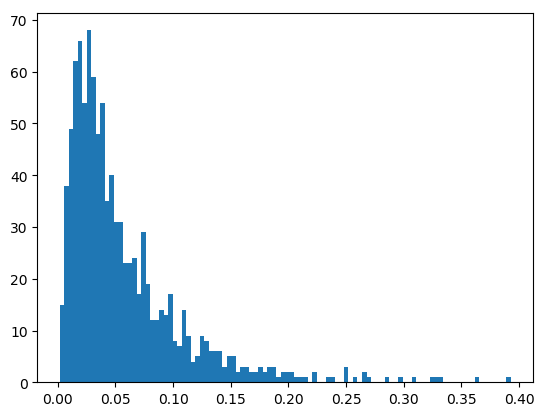

([15.0, 38.0, 49.0, 62.0, 66.0, 54.0, 68.0, 59.0, 48.0, 54.0  …  0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0019250112969196036, 0.005833790209630331, 0.009742569122341059, 0.013651348035051785, 0.017560126947762513, 0.02146890586047324, 0.025377684773183966, 0.029286463685894694, 0.03319524259860542, 0.03710402151131615  …  0.35762389235359576, 0.3615326712663065, 0.3654414501790172, 0.36935022909172793, 0.3732590080044387, 0.37716778691714936, 0.3810765658298601, 0.38498534474257085, 0.3888941236552816, 0.39280290256799233], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x000000006AFE97B8>, PyObject <matplotlib.patches.Rectangle object at 0x000000006AFE95C0>, PyObject <matplotlib.patches.Rectangle object at 0x000000006AFE9DD8>, PyObject <matplotlib.patches.Rectangle object at 0x000000006B24B160>, PyObject <matplotlib.patches.Rectangle object at 0x000000006B24B4A8>, PyObject <matplotlib.patches.Rectangle object at 0x000000006B24B7F0>, PyObject <matplotlib

In [49]:
_, sym2range = Turing.Variational.bijector(model; sym_to_ranges = Val(true));
samples = squeeze(rand(q,1000)[sym2range[:θ1]...,:])
plt.hist(samples, bins=100) # should be 0.95

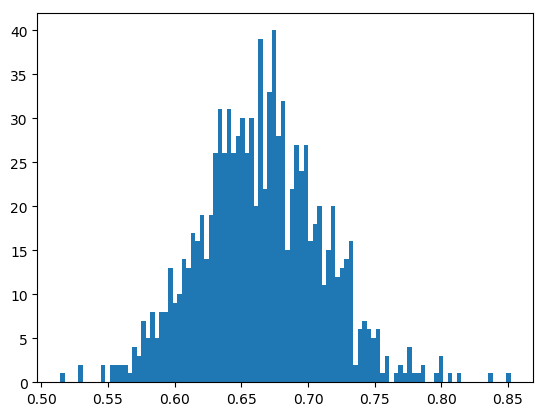

([1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0], [0.5139580723709821, 0.5173408106236218, 0.5207235488762616, 0.5241062871289013, 0.5274890253815411, 0.5308717636341808, 0.5342545018868206, 0.5376372401394602, 0.5410199783921, 0.5444027166447397  …  0.8217872533611978, 0.8251699916138375, 0.8285527298664773, 0.831935468119117, 0.8353182063717568, 0.8387009446243965, 0.8420836828770362, 0.845466421129676, 0.8488491593823158, 0.8522318976349554], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x000000006C88F518>, PyObject <matplotlib.patches.Rectangle object at 0x000000006C88F320>, PyObject <matplotlib.patches.Rectangle object at 0x000000006C88FB38>, PyObject <matplotlib.patches.Rectangle object at 0x000000006C88FE80>, PyObject <matplotlib.patches.Rectangle object at 0x000000006C89A208>, PyObject <matplotlib.patches.Rectangle object at 0x000000006C89A550>, PyObject <matplotlib.patches.Rectangle object at 0x0000000

In [50]:
samples = squeeze(rand(q,1000)[sym2range[:σ1]...,:])
plt.hist(samples, bins=100) # should be 0.2

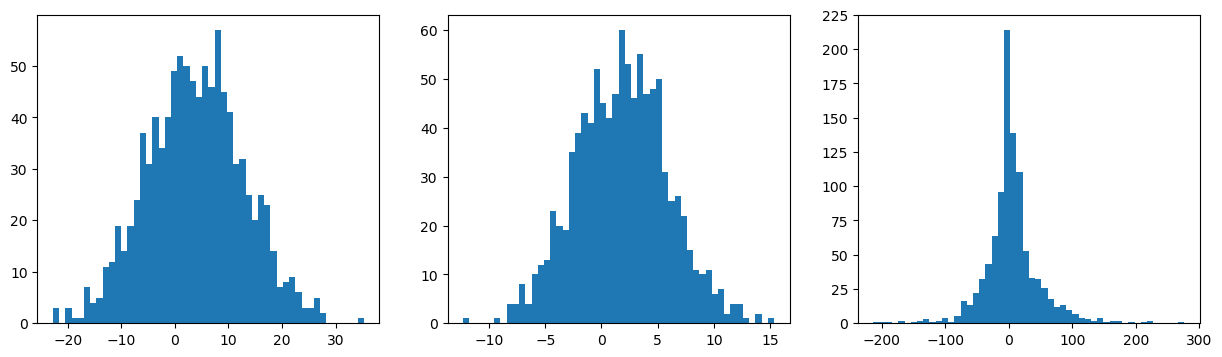

In [51]:
z1 = rand(Normal(4, 9), 1000)
z2 = rand(Normal(2, 4), 1000)
z3 = z1.*z2

_, ax = plt.subplots(ncols=3, figsize=(15,4))
ax[1].hist(z1, bins=50)
ax[2].hist(z2, bins=50)
ax[3].hist(z3, bins=50);

# Own implementation in FL (univariate case)

$$ s_{f,t} = \theta_f \cdot s_{f,t-1} + w_f $$
$$ w_f \sim \Gamma(a_f, b_f) $$

$$ S_t = \begin{bmatrix} \theta_1 \\ \theta_1 \\ \theta_2 \\ \theta_2 \\ \vdots \\ \theta_F \\ \theta_F \end{bmatrix} \circ S_{t-1} + {\bf{w}} $$
$$ {\bf{w}} \sim \mathcal{N}(0, W^{-1}) $$
$$ W = \begin{bmatrix} \gamma_1 \\ & \gamma_1 \\ & & \gamma_2 \\ & & & \gamma_2 \\ & & & & \ddots \\ & & & & & \gamma_F \\ & & & & & & \gamma_F\end{bmatrix}$$

In [52]:
mutable struct AutoregressiveFilterbank <: ForneyLab.SoftFactor
    id::Symbol
    interfaces::Vector{Interface}
    i::Dict{Symbol,Interface}

    function AutoregressiveFilterbank(y, x, θ, γ; id=ForneyLab.generateId(AutoregressiveFilterbank))
        @ensureVariables(y, x, θ, γ)
        self = new(id, Array{Interface}(undef, 4), Dict{Symbol,Interface}())
        ForneyLab.addNode!(currentGraph(), self)
        self.i[:y] = self.interfaces[1] = ForneyLab.associate!(Interface(self), y)
        self.i[:x] = self.interfaces[2] = ForneyLab.associate!(Interface(self), x)
        self.i[:θ] = self.interfaces[3] = ForneyLab.associate!(Interface(self), θ)
        self.i[:γ] = self.interfaces[4] = ForneyLab.associate!(Interface(self), γ)
        return self
    end
end
slug(::Type{AutoregressiveFilterbank}) = "ARFB"

slug (generic function with 1 method)

In [53]:
function ruleVariationalARFBOutNPPP(marg_y :: Nothing,
                                    marg_x :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_θ :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_γ :: ProbabilityDistribution{ForneyLab.Univariate})
    
    # calculate required means
    mθ = ForneyLab.unsafeMean(marg_θ)
    mx = ForneyLab.unsafeMean(marg_x)
    mγ = ForneyLab.unsafeMean(marg_γ)
    
    # calculate new parameters
    my = mθ * mx
    vy = 1/mγ
    
    # create variational message
    Message(ForneyLab.Univariate, GaussianWeightedMeanPrecision, xi=my/vy, w=1/vy)
end

ruleVariationalARFBOutNPPP (generic function with 1 method)

In [54]:
function ruleVariationalARFBIn1PNPP(marg_y :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_x :: Nothing,
                                    marg_θ :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_γ :: ProbabilityDistribution{ForneyLab.Univariate})
    
    # calculate required means
    my = ForneyLab.unsafeMean(marg_y)
    mθ = ForneyLab.unsafeMean(marg_θ)
    mγ = ForneyLab.unsafeMean(marg_γ)
    
    # calculate required variances
    vθ = ForneyLab.unsafeCov(marg_θ)
    
    # calculate new parameters
    mx = mθ*my/(vθ + mθ^2)
    vx = 1/(mγ*(vθ + mθ^2))
    
    # create variational message
    Message(ForneyLab.Univariate, GaussianWeightedMeanPrecision, xi=mx/vx, w=1/vx)
end

ruleVariationalARFBIn1PNPP (generic function with 1 method)

In [55]:
function ruleVariationalARFBIn2PPNP(marg_y :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_x :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_θ :: Nothing,
                                    marg_γ :: ProbabilityDistribution{ForneyLab.Univariate})
    
    # calculate required means
    my = ForneyLab.unsafeMean(marg_y)
    mx = ForneyLab.unsafeMean(marg_x)
    mγ = ForneyLab.unsafeMean(marg_γ)
    
    # calculate required variances
    vx = ForneyLab.unsafeCov(marg_x)
    
    # calculate new parameters
    mθ = mx*my/(vx + mx^2)
    vθ = 1/(mγ*(vx + mx^2))
    
    # create variational message
    Message(ForneyLab.Univariate, GaussianWeightedMeanPrecision, xi=mθ/vθ, w=1/vθ)
end

ruleVariationalARFBIn2PPNP (generic function with 1 method)

In [56]:
function ruleVariationalARFBIn3PPPN(marg_y :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_x :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_θ :: ProbabilityDistribution{ForneyLab.Univariate},
                                    marg_γ :: Nothing)
    
    # calculate required means
    my = ForneyLab.unsafeMean(marg_y)
    mx = ForneyLab.unsafeMean(marg_x)
    mθ = ForneyLab.unsafeMean(marg_θ)
    
    # calculate required variances
    vy = ForneyLab.unsafeCov(marg_y)
    vx = ForneyLab.unsafeCov(marg_x)
    vθ = ForneyLab.unsafeCov(marg_θ)
    
    # calculate new parameters
    a = 3/2
    b = 1/2*((vy + my^2) + (vθ + mθ^2)*(vx + mx^2) - 2*mθ*mx*my)
    
    # create variational message
    Message(ForneyLab.Gamma, a=a, b=b)
end

ruleVariationalARFBIn3PPPN (generic function with 1 method)

In [57]:
@naiveVariationalRule(:node_type     => AutoregressiveFilterbank,
                      :outbound_type => Message{GaussianWeightedMeanPrecision},
                      :inbound_types => (Nothing, ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution),
                      :name          => VariationalARFBOutNPPP)


@naiveVariationalRule(:node_type     => AutoregressiveFilterbank,
                      :outbound_type => Message{GaussianWeightedMeanPrecision},
                      :inbound_types => (ProbabilityDistribution, Nothing, ProbabilityDistribution, ProbabilityDistribution),
                      :name          => VariationalARFBIn1PNPP)

@naiveVariationalRule(:node_type     => AutoregressiveFilterbank,
                      :outbound_type => Message{GaussianWeightedMeanPrecision},
                      :inbound_types => (ProbabilityDistribution, ProbabilityDistribution, Nothing, ProbabilityDistribution),
                      :name          => VariationalARFBIn2PPNP)

@naiveVariationalRule(:node_type     => AutoregressiveFilterbank,
                      :outbound_type => Message{ForneyLab.Gamma},
                      :inbound_types => (ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution, Nothing),
                      :name          => VariationalARFBIn3PPPN)

In [58]:
fg = FactorGraph()

@RV smin ~ GaussianMeanVariance(placeholder(:μ_smin), placeholder(:Σ_smin))
@RV θ ~ GaussianMeanVariance(placeholder(:μ_θ), placeholder(:Σ_θ))
@RV γ ~ ForneyLab.Gamma(placeholder(:a_γ), placeholder(:b_γ))
@RV s ~ AutoregressiveFilterbank(smin, θ, γ)
@RV x = s * placeholder(:c)
@RV y ~ GaussianMeanVariance(x, placeholder(:Σ_x))
placeholder(y, :y)

q = PosteriorFactorization(smin, s, θ, γ, ids=[:smin :s :θ :γ])

ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 17809111759840027410 -->
 17809111759840027410 
 
 placeholder_μ_θ 
 
<!-- 7759986508018113098 -->
 7759986508018113098 
 
 placeholder_Σ_smin 
 
<!-- 16999743314144588334 -->
 16999743314144588334 
 
 × 
 multiplication_1 
 
<!-- 11512811432902380324 -->
 11512811432902380324 
 
 AutoregressiveFilterbank 
 autoregressivefilterbank_1 
 
<!-- 16999743314144588334--11512811432902380324 -->
 16999743314144588334--11512811432902380324 
 
 s 
 1 y 
 3 a 
 
<!-- 13112089143361410021 -->
 13112089143361410021 
 
 placeholder_c 
 
<!-- 16999743314144588334--13112089143361410021 -->
 16999743314144588334--13112089143361410021 
 
 c 
 1 out 
 2 in1 
 
<!-- 6608245229280879477 -->
 6608245229280879477 
 
 𝒩 
 gaussianmeanvariance_3 
 
<!-- 6608245229280879477--16999743314144588334 -->
 6608245229280879477--16999743314144588334 
 
 x 
 1 out 
 2 m 
 
<!-- 16204225653130976960 -->
 16204225653130976960 
 
 placeholder_Σ_x 
 
<!-- 6608245229280879477--16204225653130976960 -->
 6608245229280879477--16204225653130976960 
 
 Σ_x 
 1 out 
 3 v 
 
<!-- 6143879867746012137 -->
 6143879867746012137 
 
 𝒩 
 gaussianmeanvariance_2 
 
<!-- 6143879867746012137--17809111759840027410 -->
 6143879867746012137--17809111759840027410 
 
 μ_θ 
 1 out 
 2 m 
 
<!-- 13068585142756028920 -->
 13068585142756028920 
 
 placeholder_Σ_θ 
 
<!-- 6143879867746012137--13068585142756028920 -->
 6143879867746012137--13068585142756028920 
 
 Σ_θ 
 1 out 
 3 v 
 
<!-- 8522343664875366514 -->
 8522343664875366514 
 
 placeholder_a_γ 
 
<!-- 11457938406859493400 -->
 11457938406859493400 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 11457938406859493400--7759986508018113098 -->
 11457938406859493400--7759986508018113098 
 
 Σ_smin 
 1 out 
 3 v 
 
<!-- 6011394343342312920 -->
 6011394343342312920 
 
 placeholder_μ_smin 
 
<!-- 11457938406859493400--6011394343342312920 -->
 11457938406859493400--6011394343342312920 
 
 μ_smin 
 1 out 
 2 m 
 
<!-- 10721318347371613519 -->
 10721318347371613519 
 
 placeholder_y 
 
<!-- 10721318347371613519--6608245229280879477 -->
 10721318347371613519--6608245229280879477 
 
 y 
 1 out 
 1 out 
 
<!-- 8016978218951872730 -->
 8016978218951872730 
 
 placeholder_b_γ 
 
<!-- 11512811432902380324--6143879867746012137 -->
 11512811432902380324--6143879867746012137 
 
 θ 
 1 out 
 3 θ 
 
<!-- 11512811432902380324--11457938406859493400 -->
 11512811432902380324--11457938406859493400 
 
 smin 
 1 out 
 2 x 
 
<!-- 2736858592814869317 -->
 2736858592814869317 
 
 Gam 
 gamma_1 
 
<!-- 11512811432902380324--2736858592814869317 -->
 11512811432902380324--2736858592814869317 
 
 γ 
 1 out 
 4 γ 
 
<!-- 2736858592814869317--8522343664875366514 -->
 2736858592814869317--8522343664875366514 
 
 a_γ 
 1 out 
 2 a 
 
<!-- 2736858592814869317--8016978218951872730 -->
 2736858592814869317--8016978218951872730 
 
 b_γ 
 1 out 
 3 b

In [59]:
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function stepγ!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaOut(nothing, ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:a_γ]), ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:b_γ]))
messages[2] = ruleVariationalARFBIn3PPPN(marginals[:s], marginals[:smin], marginals[:θ], nothing)

marginals[:γ] = messages[1].dist * messages[2].dist

return marginals

end

function steps!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 4))

messages[1] = ruleVariationalARFBOutNPPP(nothing, marginals[:smin], marginals[:θ], marginals[:γ])
messages[2] = ruleSPMultiplicationOutNPG(nothing, Message(ForneyLab.Univariate, PointMass, m=data[:c]), messages[1])
messages[3] = ruleVBGaussianMeanVarianceM(ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:y]), nothing, ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:Σ_x]))
messages[4] = rule

In [60]:
# signal statistics 
N = 5000
fs = 10

# process parameters
ρ = 0.95
f = 2
σ_p = 0.2
σ_n = 0.01

# create signal (option 1)
si = Array{Float64,1}(undef, N)
xi = Array{Float64,1}(undef, N)
yi = Array{Float64,1}(undef, N)
si[1] = 0 
xi[1] = 0
yi[1] = 0
for n = 2:N
    si[n] = ρ*si[n-1] + rand(Normal(0, σ_p)) 
    xi[n] = si[n]*cos(2*pi*f/fs*n)
    yi[n] = rand(Normal(xi[n], σ_n))
end

t = collect(1:N)/fs
;

In [61]:
μ_θ_mem = Array{Float64,1}(undef, N)
Σ_θ_mem = Array{Float64,1}(undef, N)
m_γ_mem = Array{Float64,1}(undef, N)

# priors
μ_smin = 0
Σ_smin = 0.1
μ_θ = 0.5
Σ_θ = 1
a_γ = 1
b_γ = 0.001
Σ_x = 0.01*0.01
    
for n = 1:N
    
    # fill marginals dictionary
    marginals = Dict()
    marginals[:smin] = ProbabilityDistribution(GaussianMeanVariance, m=μ_smin, v=Σ_smin)
    marginals[:θ] = ProbabilityDistribution(GaussianMeanVariance, m=μ_θ, v=Σ_θ)
    marginals[:γ] = ProbabilityDistribution(ForneyLab.Gamma, a=a_γ, b=b_γ)
    
    # fill data dictionary
    data = Dict()
    data[:μ_smin] = μ_smin
    data[:Σ_smin] = Σ_smin
    data[:μ_θ] = μ_θ
    data[:Σ_θ] = Σ_θ
    data[:a_γ] = a_γ
    data[:b_γ] = b_γ
    data[:c] = cos(2*pi*f*t[n])
    data[:Σ_x] = Σ_x
    data[:y] = yi[n]    
    
    # perform updates
    for _ in 1:5
        Base.invokelatest(steps!, data, marginals)
        Base.invokelatest(stepγ!, data, marginals)
        Base.invokelatest(stepθ!, data, marginals)
        Base.invokelatest(stepsmin!, data, marginals)
    end
    
    # update parameters
    μ_smin = ForneyLab.unsafeMean(marginals[:s])
    Σ_smin = ForneyLab.unsafeCov(marginals[:s])
    μ_θ = ForneyLab.unsafeMean(marginals[:θ])
    Σ_θ = ForneyLab.unsafeCov(marginals[:θ])
    a_γ = marginals[:γ].params[:a]
    b_γ = marginals[:γ].params[:b]
    
    # save parameters
    μ_θ_mem[n] = μ_θ
    Σ_θ_mem[n] = Σ_θ
    m_γ_mem[n] = a_γ/b_γ
    
end

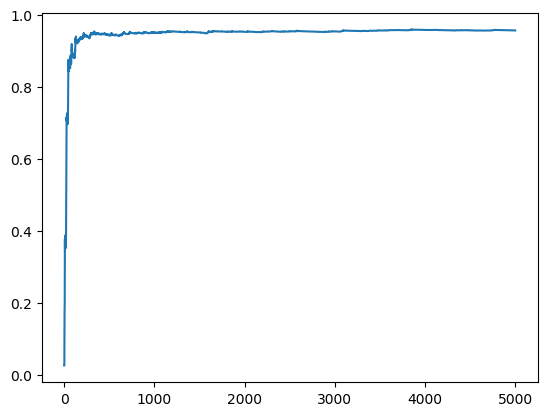

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001204550>

In [62]:
plt.plot(μ_θ_mem)

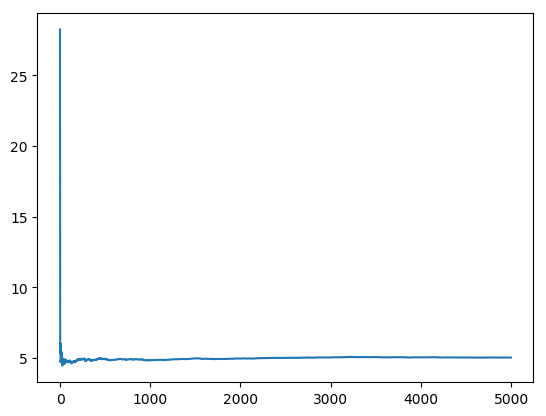

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006E1D9470>

In [63]:
plt.plot(sqrt.(m_γ_mem))

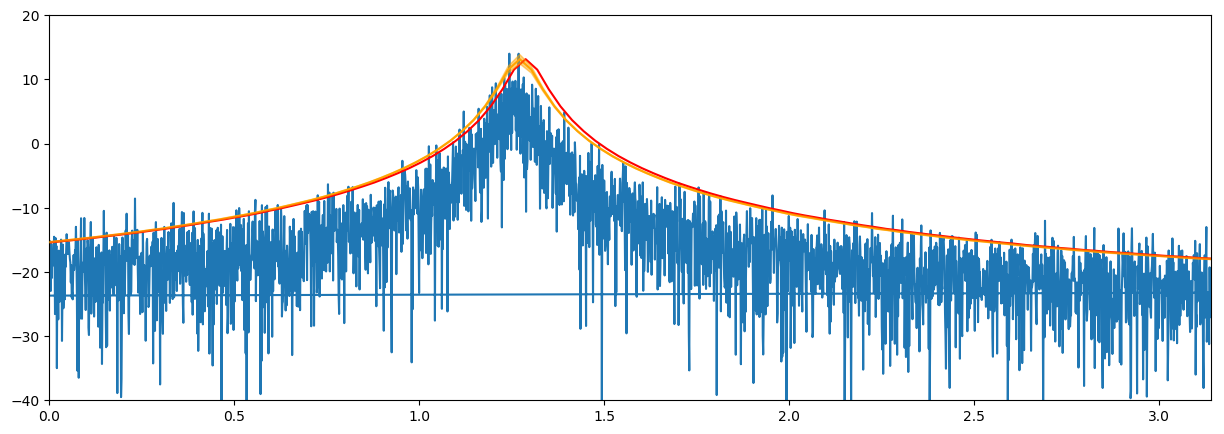

(0, 3.141592653589793)

In [64]:
plt.figure(figsize=(15,5))

plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

tmp_psd = zeros(101)
θ_sampled, γ_sampled = AR_distributions([μ_θ], mat(1/Σ_θ), a_γ, b_γ)
mean_psd, std_psd = summary_psd(θ_sampled, γ_sampled)
mean_psd = vcat(reverse(mean_psd), mean_psd[2:end])
std_psd = vcat(reverse(std_psd), std_psd[2:end])
θx = collect(1:length(mean_psd))/length(mean_psd)*2*pi .- pi .+ 2*pi*f/fs
gca().plot(θx, mean_psd, color="orange", label="predicted psd")
gca().fill_between(θx, mean_psd .- std_psd, mean_psd .+ std_psd, color="orange", alpha=0.5, zorder=100)
tmp_psd = tmp_psd + 10 .^(mean_psd[100-Int(round(f/fs*200)):200-Int(round(f/fs*200))]/10)

gca().plot(collect(0:100)/100*pi, 10*log10.(tmp_psd), color="red")
plt.ylim(-40, 20)

plt.xlim(0,pi)

# Own implementation in FL (multivariate case)

In [65]:
mutable struct AutoregressiveFilterbankMV <: ForneyLab.SoftFactor
    id::Symbol
    interfaces::Vector{Interface}
    i::Dict{Symbol,Interface}

    function AutoregressiveFilterbankMV(y, x, θ, γ...; id=ForneyLab.generateId(AutoregressiveFilterbankMV))
        #@ensureVariables(y, x, θ, γ...)
        self = new(id, Array{Interface}(undef, 3 + length(γ)), Dict{Symbol,Interface}())
        ForneyLab.addNode!(currentGraph(), self)
        self.i[:y] = self.interfaces[1] = ForneyLab.associate!(Interface(self), y)
        self.i[:x] = self.interfaces[2] = ForneyLab.associate!(Interface(self), x)
        self.i[:θ] = self.interfaces[3] = ForneyLab.associate!(Interface(self), θ)
        for k = 1:length(γ)
            self.i[pad(:γ,k)] = self.interfaces[3+k] = ForneyLab.associate!(Interface(self), γ[k])
        end
        return self
    end
end
slug(::Type{AutoregressiveFilterbankMV}) = "ARFBMV"

slug (generic function with 2 methods)

In [66]:
function functionnames(nr_γ, k)
    
    if k == 1
        name = "ruleVariationalARFBMVOutN"
        name = name*"P"^(nr_γ+2)
    else
        name = "ruleVariationalARFBMVIn"*string(k-1)
        tmp = collect("P"^(nr_γ+3))
        tmp[k] = 'N'
        tmp = String(tmp)
        name = name*tmp
    end
    
    return name

end

functionnames (generic function with 1 method)

In [67]:
function generatefunctions(nr_γ)
    
    functions = Array{Expr}(undef, nr_γ+3)

    
    for k = 1:nr_γ+3
        
        if k == 1
            tmp = Symbol(functionnames(nr_γ,k))
            functions[k] = quote
                function $tmp(marg_y::MVprobnothing, marg_x::MVprobnothing, marg_θ::MVprobnothing, marg_γ...)
                    
                    mθ = ForneyLab.unsafeMean(marg_θ)
                    mx = ForneyLab.unsafeMean(marg_x)
                    mγ = Array{Float64,1}(undef, length(mθ))
                    for i = 1:length(mγ)
                        mγ[i] = ForneyLab.unsafeMean(marg_γ[i])
                    end
                    
                    # calculate new parameters
                    my = mθ .* mx
                    vy = 1 ./ mγ

                    # create variational message
                    return Message(ForneyLab.Multivariate, GaussianWeightedMeanPrecision, xi=my ./ vy, w=diagm(1 ./ vy))
                
                end
            end
            
         elseif k == 2
            tmp = Symbol(functionnames(nr_γ,k))
            functions[k] = quote
                function $tmp(marg_y::MVprobnothing, marg_x::MVprobnothing, marg_θ::MVprobnothing, marg_γ...)
                    
                    # calculate required means
                    my = ForneyLab.unsafeMean(marg_y)
                    mθ = ForneyLab.unsafeMean(marg_θ)
                    mγ = Array{Float64,1}(undef, length(mθ))
                    for i = 1:length(mγ)
                        mγ[i] = ForneyLab.unsafeMean(marg_γ[i])
                    end

                    # calculate required variances
                    vθ = diag(ForneyLab.unsafeCov(marg_θ))

                    # calculate new parameters
                    mx = mθ.*my./(vθ + mθ.^2)
                    vx = 1 ./(mγ.*(vθ + mθ.^2))

                    # create variational message
                    return Message(ForneyLab.Multivariate, GaussianWeightedMeanPrecision, xi=mx./vx, w=diagm(1 ./vx))
                
                end
            end 
                
        elseif k == 3
            tmp = Symbol(functionnames(nr_γ,k))
            functions[k] = quote
                function $tmp(marg_y::MVprobnothing, marg_x::MVprobnothing, marg_θ::MVprobnothing, marg_γ...)
                    
                    # calculate required means
                    my = ForneyLab.unsafeMean(marg_y)
                    mx = ForneyLab.unsafeMean(marg_x)
                    mγ = Array{Float64,1}(undef, length(my))
                    for i = 1:length(mγ)
                        mγ[i] = ForneyLab.unsafeMean(marg_γ[i])
                    end

                    # calculate required variances
                    vx = diag(ForneyLab.unsafeCov(marg_x))

                    # calculate new parameters
                    mθ = mx.*my./(vx + mx.^2)
                    vθ = 1 ./(mγ.*(vx + mx.^2))

                    # create variational message
                    Message(ForneyLab.Multivariate, GaussianWeightedMeanPrecision, xi=mθ./vθ, w=diagm(1 ./vθ))
                
                end
            end
            
        else
            tmp = Symbol(functionnames(nr_γ,k))
            functions[k] = quote
                function $tmp(marg_y::MVprobnothing, marg_x::MVprobnothing, marg_θ::MVprobnothing, marg_γ...)
                    
                    # calculate required means
                    my = ForneyLab.unsafeMean(marg_y)
                    mx = ForneyLab.unsafeMean(marg_x)
                    mθ = ForneyLab.unsafeMean(marg_θ)

                    # calculate required variances
                    vy = diag(ForneyLab.unsafeCov(marg_y))
                    vx = diag(ForneyLab.unsafeCov(marg_x))
                    vθ = diag(ForneyLab.unsafeCov(marg_θ))

                    # calculate new parameters
                    a = 3/2
                    b = 1/2*((vy + my.^2) + (vθ + mθ.^2).*(vx + mx.^2) - 2*mθ.*mx.*my)[$k-3]

                    # create variational message
                    Message(ForneyLab.Gamma, a=a, b=b)
                
                end
            end
            
         end
        
    end
    
    return functions
    
end

generatefunctions (generic function with 1 method)

In [68]:
functions = generatefunctions(2)
MVprobnothing = Union{ProbabilityDistribution{ForneyLab.Multivariate},Nothing}
UVprobnothing = Union{ProbabilityDistribution{ForneyLab.Univariate},Nothing}
for k = 1:length(functions)
    eval(functions[k])
end
functions

5-element Array{Expr,1}:
 quote
    #= In[67]:11 =#
    function ruleVariationalARFBMVOutNPPPP(marg_y::MVprobnothing, marg_x::MVprobnothing, marg_θ::MVprobnothing, marg_γ...)
        #= In[67]:13 =#
        mθ = ForneyLab.unsafeMean(marg_θ)
        #= In[67]:14 =#
        mx = ForneyLab.unsafeMean(marg_x)
        #= In[67]:15 =#
        mγ = Array{Float64, 1}(undef, length(mθ))
        #= In[67]:16 =#
        for i = 1:length(mγ)
            #= In[67]:17 =#
            mγ[i] = ForneyLab.unsafeMean(marg_γ[i])
        end
        #= In[67]:21 =#
        my = mθ .* mx
        #= In[67]:22 =#
        vy = 1 ./ mγ
        #= In[67]:25 =#
        return Message(ForneyLab.Multivariate, GaussianWeightedMeanPrecision, xi=my ./ vy, w=diagm(1 ./ vy))
    end
end                                                                                                               
 quote
    #= In[67]:33 =#
    function ruleVariationalARFBMVIn1PNPPP(marg_y::MVprobnothing, marg_x::MVprobnothing, marg_θ::MVp

In [69]:
# # make modular
# @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
#                       :outbound_type => Message{GaussianWeightedMeanPrecision},
#                       :inbound_types => (Nothing, ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution),
#                       :name          => VariationalARFBMVOutNPPPP)


# @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
#                       :outbound_type => Message{GaussianWeightedMeanPrecision},
#                       :inbound_types => (ProbabilityDistribution, Nothing, ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution),
#                       :name          => VariationalARFBMVIn1PNPPP)

# @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
#                       :outbound_type => Message{GaussianWeightedMeanPrecision},
#                       :inbound_types => (ProbabilityDistribution, ProbabilityDistribution, Nothing, ProbabilityDistribution, ProbabilityDistribution),
#                       :name          => VariationalARFBMVIn2PPNPP)

# @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
#                       :outbound_type => Message{ForneyLab.Gamma},
#                       :inbound_types => (ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution, Nothing, ProbabilityDistribution),
#                       :name          => VariationalARFBMVIn3PPPNP)

# @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
#                       :outbound_type => Message{ForneyLab.Gamma},
#                       :inbound_types => (ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution, ProbabilityDistribution, Nothing),
#                       :name          => VariationalARFBMVIn4PPPPN)

In [80]:
function generateFLfunctions(nr_γ)
    
    functions = Array{Expr}(undef, nr_γ+3)
    
    for k = 1:nr_γ+3
        
        if k < 4
            tmp1 = "ProbabilityDistribution, "^(k-1)*"Nothing"*", ProbabilityDistribution"^(nr_γ+3-k)
            tmp2 = Symbol(functionnames(nr_γ,k)[5:end])
            functions[k] = quote
                
                @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
                                      :outbound_type => Message{GaussianWeightedMeanPrecision},
                                      :inbound_types => $(Meta.parse(tmp1)),
                                      :name          => $tmp2)
                
            end
            
         else
            tmp1 = "ProbabilityDistribution, "^(k-1)*"Nothing"*", ProbabilityDistribution"^(nr_γ+3-k)
            tmp2 = Symbol(functionnames(nr_γ,k)[5:end])
            functions[k] = quote
                
                @naiveVariationalRule(:node_type     => AutoregressiveFilterbankMV,
                                      :outbound_type => Message{ForneyLab.Gamma},
                                      :inbound_types => $(Meta.parse(tmp1)),
                                      :name          => $tmp2)
                
            end
        end
                
    end
    
    return functions
    
end

generateFLfunctions (generic function with 1 method)

In [82]:
funcs = generateFLfunctions(2)
for k = 1:length(funcs)
    eval(funcs[k])
end

In [84]:
fg = FactorGraph()

@RV smin ~ GaussianMeanVariance(placeholder(:μ_smin, dims=(2,)), placeholder(:Σ_smin, dims=(2,2)))
@RV θ ~ GaussianMeanVariance(placeholder(:μ_θ, dims=(2,)), placeholder(:Σ_θ, dims=(2,2)))
@RV γ1 ~ ForneyLab.Gamma(placeholder(pad(:a_γ, 1)), placeholder(pad(:b_γ,1)))
@RV γ2 ~ ForneyLab.Gamma(placeholder(pad(:a_γ, 2)), placeholder(pad(:b_γ,2)))
@RV s ~ AutoregressiveFilterbankMV(smin, θ, γ1, γ2)
@RV x = placeholder(:c, dims=(3,2)) * s
@RV y ~ GaussianMeanVariance(x, placeholder(:Σ_x, dims=(3,3)))
placeholder(y, :y, dims=(3,))

q = PosteriorFactorization(smin, s, θ, γ1, γ2, ids=[:smin :s :θ pad(:γ,1) pad(:γ,2)])

ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 15056447127015117002 -->
 15056447127015117002 
 
 × 
 multiplication_1 
 
<!-- 16371116797806449309 -->
 16371116797806449309 
 
 AutoregressiveFilterbankMV 
 autoregressivefilterbankmv_1 
 
<!-- 15056447127015117002--16371116797806449309 -->
 15056447127015117002--16371116797806449309 
 
 s 
 1 y 
 2 in1 
 
<!-- 8821826220851385664 -->
 8821826220851385664 
 
 placeholder_c 
 
<!-- 15056447127015117002--8821826220851385664 -->
 15056447127015117002--8821826220851385664 
 
 c 
 1 out 
 3 a 
 
<!-- 13406789259840763374 -->
 13406789259840763374 
 
 placeholder_b_γ_02 
 
<!-- 7396657598512242501 -->
 7396657598512242501 
 
 placeholder_a_γ_02 
 
<!-- 7366503556530966039 -->
 7366503556530966039 
 
 placeholder_b_γ_01 
 
<!-- 3547741555890999909 -->
 3547741555890999909 
 
 Gam 
 gamma_2 
 
<!-- 16371116797806449309--3547741555890999909 -->
 16371116797806449309--3547741555890999909 
 
 γ2 
 1 out 
 5 γ_02 
 
<!-- 17213267369201460224 -->
 17213267369201460224 
 
 Gam 
 gamma_1 
 
<!-- 16371116797806449309--17213267369201460224 -->
 16371116797806449309--17213267369201460224 
 
 γ1 
 1 out 
 4 γ_01 
 
<!-- 17759269186506337021 -->
 17759269186506337021 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 16371116797806449309--17759269186506337021 -->
 16371116797806449309--17759269186506337021 
 
 smin 
 1 out 
 2 x 
 
<!-- 12331415145233803862 -->
 12331415145233803862 
 
 𝒩 
 gaussianmeanvariance_2 
 
<!-- 16371116797806449309--12331415145233803862 -->
 16371116797806449309--12331415145233803862 
 
 θ 
 1 out 
 3 θ 
 
<!-- 3547741555890999909--13406789259840763374 -->
 3547741555890999909--13406789259840763374 
 
 b_γ_02 
 1 out 
 3 b 
 
<!-- 3547741555890999909--7396657598512242501 -->
 3547741555890999909--7396657598512242501 
 
 a_γ_02 
 1 out 
 2 a 
 
<!-- 3324269983558396925 -->
 3324269983558396925 
 
 𝒩 
 gaussianmeanvariance_3 
 
<!-- 3324269983558396925--15056447127015117002 -->
 3324269983558396925--15056447127015117002 
 
 x 
 1 out 
 2 m 
 
<!-- 2455758709593414957 -->
 2455758709593414957 
 
 placeholder_Σ_x 
 
<!-- 3324269983558396925--2455758709593414957 -->
 3324269983558396925--2455758709593414957 
 
 Σ_x 
 1 out 
 3 v 
 
<!-- 17697698627640523037 -->
 17697698627640523037 
 
 placeholder_μ_θ 
 
<!-- 17213267369201460224--7366503556530966039 -->
 17213267369201460224--7366503556530966039 
 
 b_γ_01 
 1 out 
 3 b 
 
<!-- 16605159296792702034 -->
 16605159296792702034 
 
 placeholder_a_γ_01 
 
<!-- 17213267369201460224--16605159296792702034 -->
 17213267369201460224--16605159296792702034 
 
 a_γ_01 
 1 out 
 2 a 
 
<!-- 5399957059353043378 -->
 5399957059353043378 
 
 placeholder_μ_smin 
 
<!-- 17759269186506337021--5399957059353043378 -->
 17759269186506337021--5399957059353043378 
 
 μ_smin 
 1 out 
 2 m 
 
<!-- 18257119146849684096 -->
 18257119146849684096 
 
 placeholder_Σ_smin 
 
<!-- 17759269186506337021--18257119146849684096 -->
 17759269186506337021--18257119146849684096 
 
 Σ_smin 
 1 out 
 3 v 
 
<!-- 10173061757159184903 -->
 10173061757159184903 
 
 placeholder_y 
 
<!-- 10173061757159184903--3324269983558396925 -->
 10173061757159184903--3324269983558396925 
 
 y 
 1 out 
 1 out 
 
<!-- 15497764296831463477 -->
 15497764296831463477 
 
 placeholder_Σ_θ 
 
<!-- 12331415145233803862--17697698627640523037 -->
 12331415145233803862--17697698627640523037 
 
 μ_θ 
 1 out 
 2 m 
 
<!-- 12331415145233803862--15497764296831463477 -->
 12331415145233803862--15497764296831463477 
 
 Σ_θ 
 1 out 
 3 v

In [85]:
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function steps!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 4))

messages[1] = ruleVariationalARFBMVOutNPPPP(nothing, marginals[:smin], marginals[:θ], marginals[:γ1], marginals[:γ2])
messages[2] = ruleSPMultiplicationOutNGP(nothing, messages[1], Message(MatrixVariate, PointMass, m=data[:c]))
messages[3] = ruleVBGaussianMeanVarianceM(ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:y]), nothing, ProbabilityDistribution(MatrixVariate, PointMass, m=data[:Σ_x]))
messages[4] = ruleSPMultiplicationIn1GNP(messages[3], nothing, Message(MatrixVariate, PointMass, m=data[:c]))

marginals[:s] = messages[1].dist * messages[4].dist
marginals[:x] = messages[2].dist * messages[3].dist

return marginals

end

function stepγ_02!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaOut(nothing, ProbabilityDistribution(ForneyLab.Univariate, PointMass, m=data[:a_γ_02]), ProbabilityD

In [100]:
# signal statistics 
N = 5000
fs = 10

# process parameters
ρ1 = 0.999
ρ2 = 0.9
f1 = 2
f2 = 3.5
σ_p1 = 0.2
σ_p2 = 0.3
σ_n = 0.01

# create signal (option 1)
si1 = Array{Float64,1}(undef, N)
si2 = Array{Float64,1}(undef, N)
xi = Array{Float64,1}(undef, N)
yi = Array{Float64,1}(undef, N)
si1[1] = 0 
si2[1] = 0 
xi[1] = 0
yi[1] = 0
for n = 2:N
    si1[n] = ρ1*si1[n-1] + rand(Normal(0, σ_p1)) 
    si2[n] = ρ2*si2[n-1] + rand(Normal(0, σ_p2)) 
    xi[n] = si1[n]*cos(2*pi*f1/fs*n) + si2[n]*cos(2*pi*f2/fs*n)
    yi[n] = rand(Normal(xi[n], σ_n))
end

t = collect(1:N)/fs
;

In [101]:
μ_θ_mem = Array{Float64,2}(undef, N,2)
Σ_θ_mem = Array{Float64,2}(undef, N,2)
m_γ1_mem = Array{Float64,1}(undef, N)
m_γ2_mem = Array{Float64,1}(undef, N)

# priors
μ_smin = [0.0, 0.0]
Σ_smin = 0.1*Ic(2)
μ_θ = [0.5, 0.5]
Σ_θ = 0.1*Ic(2)
a_γ1 = 1
b_γ1 = 0.001
a_γ2 = 1
b_γ2 = 0.001
Σ_x = 0.01*0.01
    
for n = 3:N
    
    # fill marginals dictionary
    marginals = Dict()
    marginals[:smin] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=μ_smin, v=Σ_smin)
    marginals[:θ] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=μ_θ, v=Σ_θ)
    marginals[:γ1] = ProbabilityDistribution(ForneyLab.Gamma, a=a_γ1, b=b_γ1)
    marginals[:γ2] = ProbabilityDistribution(ForneyLab.Gamma, a=a_γ2, b=b_γ2)
    
    # fill data dictionary
    data = Dict()
    data[:μ_smin] = μ_smin
    data[:Σ_smin] = Σ_smin
    data[:μ_θ] = μ_θ
    data[:Σ_θ] = Σ_θ
    data[pad(:a_γ,1)] = a_γ1
    data[pad(:b_γ,1)] = b_γ1
    data[pad(:a_γ,2)] = a_γ2
    data[pad(:b_γ,2)] = b_γ2
    tmp = [cos(2*pi*f1*t[n]) cos(2*pi*f2*t[n])
           cos(2*pi*f1*t[n-1]) cos(2*pi*f2*t[n-1])
           cos(2*pi*f1*t[n-2]) cos(2*pi*f2*t[n-2])]
    data[:c] = tmp#transpose(reshape(tmp, (size(tmp)...,1)))
    data[:Σ_x] = Σ_x*Ic(3)
    data[:y] = [yi[n], yi[n-1], yi[n-2]]    
    
    # perform updates
    for _ in 1:5
        Base.invokelatest(steps!, data, marginals)
        Base.invokelatest(stepθ!, data, marginals)
        Base.invokelatest(stepγ_01!, data, marginals)
        Base.invokelatest(stepγ_02!, data, marginals)
        Base.invokelatest(stepsmin!, data, marginals)
    end
    
    # update parameters
    μ_smin = ForneyLab.unsafeMean(marginals[:s])
    Σ_smin = ForneyLab.unsafeCov(marginals[:s])
    μ_θ = ForneyLab.unsafeMean(marginals[:θ])
    Σ_θ = ForneyLab.unsafeCov(marginals[:θ])
    a_γ1 = marginals[:γ1].params[:a]
    b_γ1 = marginals[:γ1].params[:b]
    a_γ2 = marginals[:γ2].params[:a]
    b_γ2 = marginals[:γ2].params[:b]

    # save parameters
    μ_θ_mem[n,:] = μ_θ
    Σ_θ_mem[n,:] = diag(Σ_θ)
    m_γ1_mem[n] = a_γ1/b_γ1
    m_γ2_mem[n] = a_γ2/b_γ2
    
end

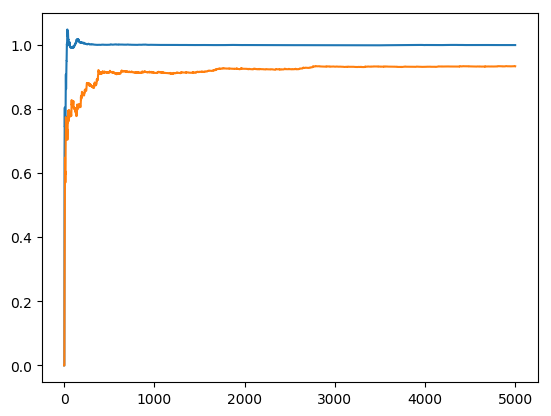

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006E383FD0>
 PyObject <matplotlib.lines.Line2D object at 0x000000006E383710>

In [102]:
plt.plot(μ_θ_mem)

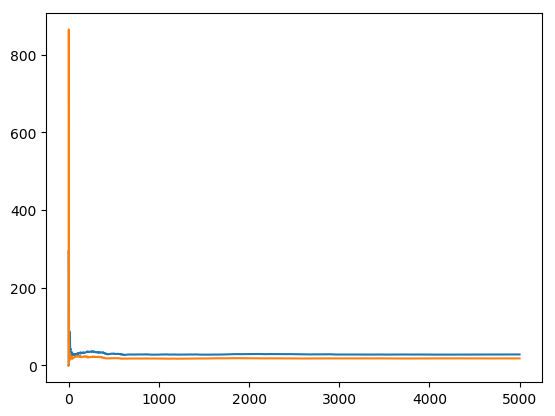

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006AE91198>

In [103]:
plt.plot(m_γ1_mem)
plt.plot(m_γ2_mem)

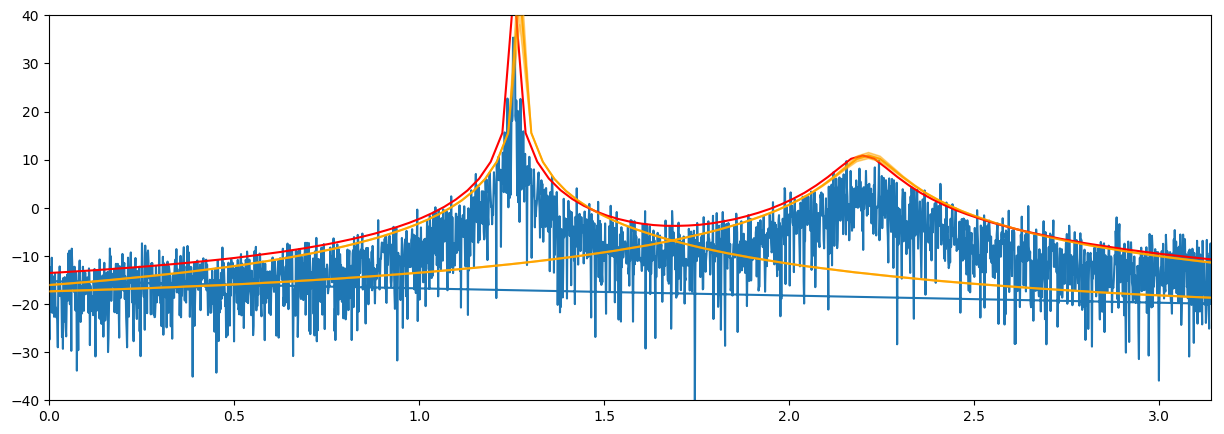

(0, 3.141592653589793)

In [104]:
plt.figure(figsize=(15,5))

plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

a_γ = [a_γ1, a_γ2]
b_γ = [b_γ1, b_γ2]
f = [f1, f2]

tmp_psd = zeros(101)
for k = 1:2
    θ_sampled, γ_sampled = AR_distributions([μ_θ_mem[end,k]], mat(1/Σ_θ_mem[end,k]), a_γ[k], b_γ[k])
    mean_psd, std_psd = summary_psd(θ_sampled, γ_sampled)
    mean_psd = vcat(reverse(mean_psd), mean_psd[2:end])
    std_psd = vcat(reverse(std_psd), std_psd[2:end])
    θx = collect(1:length(mean_psd))/length(mean_psd)*2*pi .- pi .+ 2*pi*f[k]/fs
    gca().plot(θx, mean_psd, color="orange", label="predicted psd")
    gca().fill_between(θx, mean_psd .- std_psd, mean_psd .+ std_psd, color="orange", alpha=0.5, zorder=100)
    tmp_psd = tmp_psd + 10 .^(mean_psd[101-Int(round(f[k]/fs*200)):201-Int(round(f[k]/fs*200))]/10)
end
gca().plot(collect(0:100)/100*pi, 10*log10.(tmp_psd), color="red")
plt.ylim(-40, 40)

plt.xlim(0,pi)